# Signal Quality Assessment Project

### ***Submitted by Ishaan Narula***
### ***M: +447493125408***
### ***E-mail: ishaan.narula1@gmail.com, ishaan.narula@essec.edu***

# 1. Data Quality Assessment

We are given a sample dataset by a financial signal research vendor in the file 'Sample Dataset.xlsx'. This file includes signal values generated by the vendor's proprietary system '4sight' for an ETF whose historical price data has also been provided for the period 19 November 2015 - 6 January 2020.

The objective of this project is to assess the effectiveness of the signal against the ETF's historical price data. Before this, we attempt to review the provided dataset's quality. The following 5 checks have been employed:

1. Chronological order of time series
2. Looking for trading days over the given horizon for which the dataset does not provide signal or price data
3. Finding inconsistencies in High and Low prices relative to their standard definitions
4. Using data visualisation to detect outliers in ETF price data
5. Detecting deviations in the standard historical relationship between Close and Adj Close prices
___

## 1.1. Check 1 - Chronological Order of Time Series

As a first step, we check whether the provided dataset is in chronological order, which is typically used for time series analysis.

*Note: Please ensure that this Jupyter notebook is in the same folder as the Excel file 'Sample Dataset.xlsx' for the following code to run properly.*

In [1]:
#Importing Data from Excel
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None, 'display.max_columns', None)

df = pd.read_excel(r'Sample Dataset.xlsx')

In [2]:
#Check if the Date Column is in Chronological Order
print(df['Date'].dtypes)
df_sorted = df.sort_values(by = ['Date'])
df.equals(df_sorted)

datetime64[ns]


True

The dataframe sorted by Date *df_sorted* is identical to the original dataframe *df*. This confirms that *df* was already in chronological order.

In [3]:
#Setting the Date Column as the Index of the Dataframe
df = df.set_index('Date')
df

Signal        Open        High         Low       Close  \
Date                                                                    
2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   
2015-11-27  12.879819  119.269997  119.900002  118.879997  119.620003   
2015-11-30  13.184791  120.019997  120.070000  119.050003  119.099998   
2015-12-01  12.922631  119.610001  119.910004  118.900002  119.889999   
2015-12-02  13.118076  119.730003  120.040001  118.449997  118.599998   
2015-12-03  12.916540  118.930000  119.449997  116.139999  116.599998   
2015-12-04  13.155278  116.599998  117.930000  116.339996  117.779999   
2015-12-07  12.430221  117.639999  117.669998  115.510002  116.010002   
2015-12-08  13.030335  114.959999  116.010002  114.459999  115.370003   
2015-12-09  12.439604  115.029999  116.169998  113.599998  114.080002   
2015-12-10  13.249671  113.889999  115.080002  113.650002  114.459999   
2015-12-11  13.067526  113.269997  113.339996  111.529999  111.910004   
2015-12-14  13.054955  111.870003  112.379997  110.279999  111.110001   
2015-12-15  12.231405  111.730003  112.959999  111.599998  112.709999   
2015-12-16  13.078074  113.489998  114.650002  112.830002  114.430000   
2015-12-17  12.436579  114.910004  114.940002  112.970001  113.209999   
2015-12-18  13.107495  112.660004  112.889999  111.440002  111.480003   
2015-12-21  12.488531  112.169998  112.629997  111.500000  112.320000   
2015-12-22  12.943330  112.639999  113.519997  111.790001  113.349998   
2015-12-23  12.953485  113.919998  114.959999  113.730003  114.779999   
2015-12-24  12.566589  114.440002  115.160004  114.150002  114.500000   
2015-12-28  13.169915  113.980003  114.070000  112.959999  113.970001   
2015-12-29  12.988398  114.480003  115.290001  114.070000  115.199997   
2015-12-30  12.644827  115.050003  115.349998  114.000000  114.040001   
2015-12-31  11.963824  113.559998  113.970001  112.510002  112.620003   
2016-01-04  12.475992  110.610001  110.830002  109.080002  110.010002   
2016-01-05  11.093390  110.410004  110.580002  109.550003  110.250000   
2016-01-06  11.161586  108.699997  109.599998  108.000000  108.570000   
2016-01-07  12.011354  106.720001  107.500000  105.489998  105.669998   
2016-01-08  10.722719  105.870003  106.489998  103.660004  103.849998   
2016-01-11  11.328934  104.209999  104.779999  102.309998  103.400002   
2016-01-12  10.807525  104.220001  104.989998  101.940002  103.709999   
2016-01-13  11.661341  103.910004  104.419998   99.650002  100.379997   
2016-01-14  11.709747  100.860001  102.709999   99.190002  101.769997   
2016-01-15  11.682590   99.080002  100.290001   97.510002  100.120003   
2016-01-19  10.942456  101.070000  101.199997   97.739998   98.769997   
2016-01-20  11.479756   97.430000  100.330002   95.059998   99.180000   
2016-01-21  10.913312   99.330002  100.910004   98.379997   98.949997   
2016-01-22  11.435968  100.650002  101.610001  100.129997  101.370003   
2016-01-25  11.433675  100.739998  101.080002   98.849998   99.120003   
2016-01-26  11.577177   99.519997  101.400002   99.180000  101.099998   
2016-01-27  11.639571  100.589996  101.589996   99.059998   99.709999   
2016-01-28  10.712037  100.550003  100.949997   99.220001   99.690002   
2016-01-29  10.725925  100.040001  102.980003   99.959999  102.959999   
2016-02-01  11.901013  102.139999  103.089996  101.250000  102.489998   
2016-02-02  10.582996  101.330002  101.470001   99.769997  100.279999   
2016-02-03  10.626061  101.059998  101.070000   98.139999  100.410004   
2016-02-04  10.662134  100.000000  101.970001   99.970001  100.800003   
2016-02-05  11.206475  100.349998  100.440002   97.959999   98.040001   


**Conclusion**: The original dataset is already in chronological order, as a time series should be.
____

## 1.2. Check 2 - Checking for Data Availability on all Trading Days

We now see whether data in each of the columns is available for all trading days between 19 November 2015 and 6 January 2020

In [4]:
#Modifying the Original Dataframe to Add New Entries for Missing Non-weekend Days
bus_day = pd.tseries.offsets.BusinessDay()
df_exclwe = df.reindex(pd.date_range('2015-11-19', '2020-01-06', freq = bus_day))
df_exclwe

Signal        Open        High         Low       Close  \
2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   
2015-11-26        NaN         NaN         NaN         NaN         NaN   
2015-11-27  12.879819  119.269997  119.900002  118.879997  119.620003   
2015-11-30  13.184791  120.019997  120.070000  119.050003  119.099998   
2015-12-01  12.922631  119.610001  119.910004  118.900002  119.889999   
2015-12-02  13.118076  119.730003  120.040001  118.449997  118.599998   
2015-12-03  12.916540  118.930000  119.449997  116.139999  116.599998   
2015-12-04  13.155278  116.599998  117.930000  116.339996  117.779999   
2015-12-07  12.430221  117.639999  117.669998  115.510002  116.010002   
2015-12-08  13.030335  114.959999  116.010002  114.459999  115.370003   
2015-12-09  12.439604  115.029999  116.169998  113.599998  114.080002   
2015-12-10  13.249671  113.889999  115.080002  113.650002  114.459999   
2015-12-11  13.067526  113.269997  113.339996  111.529999  111.910004   
2015-12-14  13.054955  111.870003  112.379997  110.279999  111.110001   
2015-12-15  12.231405  111.730003  112.959999  111.599998  112.709999   
2015-12-16  13.078074  113.489998  114.650002  112.830002  114.430000   
2015-12-17  12.436579  114.910004  114.940002  112.970001  113.209999   
2015-12-18  13.107495  112.660004  112.889999  111.440002  111.480003   
2015-12-21  12.488531  112.169998  112.629997  111.500000  112.320000   
2015-12-22  12.943330  112.639999  113.519997  111.790001  113.349998   
2015-12-23  12.953485  113.919998  114.959999  113.730003  114.779999   
2015-12-24  12.566589  114.440002  115.160004  114.150002  114.500000   
2015-12-25        NaN         NaN         NaN         NaN         NaN   
2015-12-28  13.169915  113.980003  114.070000  112.959999  113.970001   
2015-12-29  12.988398  114.480003  115.290001  114.070000  115.199997   
2015-12-30  12.644827  115.050003  115.349998  114.000000  114.040001   
2015-12-31  11.963824  113.559998  113.970001  112.510002  112.620003   
2016-01-01        NaN         NaN         NaN         NaN         NaN   
2016-01-04  12.475992  110.610001  110.830002  109.080002  110.010002   
2016-01-05  11.093390  110.410004  110.580002  109.550003  110.250000   
2016-01-06  11.161586  108.699997  109.599998  108.000000  108.570000   
2016-01-07  12.011354  106.720001  107.500000  105.489998  105.669998   
2016-01-08  10.722719  105.870003  106.489998  103.660004  103.849998   
2016-01-11  11.328934  104.209999  104.779999  102.309998  103.400002   
2016-01-12  10.807525  104.220001  104.989998  101.940002  103.709999   
2016-01-13  11.661341  103.910004  104.419998   99.650002  100.379997   
2016-01-14  11.709747  100.860001  102.709999   99.190002  101.769997   
2016-01-15  11.682590   99.080002  100.290001   97.510002  100.120003   
2016-01-18        NaN         NaN         NaN         NaN         NaN   
2016-01-19  10.942456  101.070000  101.199997   97.739998   98.769997   
2016-01-20  11.479756   97.430000  100.330002   95.059998   99.180000   
2016-01-21  10.913312   99.330002  100.910004   98.379997   98.949997   
2016-01-22  11.435968  100.650002  101.610001  100.129997  101.370003   
2016-01-25  11.433675  100.739998  101.080002   98.849998   99.120003   
2016-01-26  11.577177   99.519997  101.400002   99.180000  101.099998   
2016-01-27  11.639571  100.589996  101.589996   99.059998   99.709999   
2016-01-28  10.712037  100.550003  100.949997   99.220001   99.690002   
2016-01-29  10.725925  100.040001  102.980003   99.959999  102.959999   
2016-02-01  11.901013  102.139999  103.089996  101.250000  102.489998   
2016-02-02  10.582996  101.330002  101.470001   99.769997  100.279999   


The dataframe *df_exclwe* checks whether data for all trading days has been provided by 4sight. There are some dates with nan values. These are probably bank holidays because the construction of the above dataframe only excludes weekends and not bank holidays. This is corrected in the next step.

In [5]:
#Modifying the Original Dataframe to Exclude Weekends and all Holidays Lying on Weekdays
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

bus_day = CustomBusinessDay(calendar = USFederalHolidayCalendar())
df_exclhol = df.reindex(pd.date_range('2015-11-19', '2020-01-06', freq = bus_day))

df_exclhol.index.name = "Date"
df_exclhol

Signal        Open        High         Low       Close  \
Date                                                                    
2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   
2015-11-27  12.879819  119.269997  119.900002  118.879997  119.620003   
2015-11-30  13.184791  120.019997  120.070000  119.050003  119.099998   
2015-12-01  12.922631  119.610001  119.910004  118.900002  119.889999   
2015-12-02  13.118076  119.730003  120.040001  118.449997  118.599998   
2015-12-03  12.916540  118.930000  119.449997  116.139999  116.599998   
2015-12-04  13.155278  116.599998  117.930000  116.339996  117.779999   
2015-12-07  12.430221  117.639999  117.669998  115.510002  116.010002   
2015-12-08  13.030335  114.959999  116.010002  114.459999  115.370003   
2015-12-09  12.439604  115.029999  116.169998  113.599998  114.080002   
2015-12-10  13.249671  113.889999  115.080002  113.650002  114.459999   
2015-12-11  13.067526  113.269997  113.339996  111.529999  111.910004   
2015-12-14  13.054955  111.870003  112.379997  110.279999  111.110001   
2015-12-15  12.231405  111.730003  112.959999  111.599998  112.709999   
2015-12-16  13.078074  113.489998  114.650002  112.830002  114.430000   
2015-12-17  12.436579  114.910004  114.940002  112.970001  113.209999   
2015-12-18  13.107495  112.660004  112.889999  111.440002  111.480003   
2015-12-21  12.488531  112.169998  112.629997  111.500000  112.320000   
2015-12-22  12.943330  112.639999  113.519997  111.790001  113.349998   
2015-12-23  12.953485  113.919998  114.959999  113.730003  114.779999   
2015-12-24  12.566589  114.440002  115.160004  114.150002  114.500000   
2015-12-28  13.169915  113.980003  114.070000  112.959999  113.970001   
2015-12-29  12.988398  114.480003  115.290001  114.070000  115.199997   
2015-12-30  12.644827  115.050003  115.349998  114.000000  114.040001   
2015-12-31  11.963824  113.559998  113.970001  112.510002  112.620003   
2016-01-04  12.475992  110.610001  110.830002  109.080002  110.010002   
2016-01-05  11.093390  110.410004  110.580002  109.550003  110.250000   
2016-01-06  11.161586  108.699997  109.599998  108.000000  108.570000   
2016-01-07  12.011354  106.720001  107.500000  105.489998  105.669998   
2016-01-08  10.722719  105.870003  106.489998  103.660004  103.849998   
2016-01-11  11.328934  104.209999  104.779999  102.309998  103.400002   
2016-01-12  10.807525  104.220001  104.989998  101.940002  103.709999   
2016-01-13  11.661341  103.910004  104.419998   99.650002  100.379997   
2016-01-14  11.709747  100.860001  102.709999   99.190002  101.769997   
2016-01-15  11.682590   99.080002  100.290001   97.510002  100.120003   
2016-01-19  10.942456  101.070000  101.199997   97.739998   98.769997   
2016-01-20  11.479756   97.430000  100.330002   95.059998   99.180000   
2016-01-21  10.913312   99.330002  100.910004   98.379997   98.949997   
2016-01-22  11.435968  100.650002  101.610001  100.129997  101.370003   
2016-01-25  11.433675  100.739998  101.080002   98.849998   99.120003   
2016-01-26  11.577177   99.519997  101.400002   99.180000  101.099998   
2016-01-27  11.639571  100.589996  101.589996   99.059998   99.709999   
2016-01-28  10.712037  100.550003  100.949997   99.220001   99.690002   
2016-01-29  10.725925  100.040001  102.980003   99.959999  102.959999   
2016-02-01  11.901013  102.139999  103.089996  101.250000  102.489998   
2016-02-02  10.582996  101.330002  101.470001   99.769997  100.279999   
2016-02-03  10.626061  101.059998  101.070000   98.139999  100.410004   
2016-02-04  10.662134  100.000000  101.970001   99.970001  100.800003   
2016-02-05  11.206475  100.349998  100.440002   97.959999   98.040001   


The above dataframe *df_exclhol* has been produced after excluding weekends and bank holidays in the US. Since the problem statement does not specify where the ETF is listed, it is assumed that it is listed on one of the exchanges in the US. Note the following issues:

1. The above dataframe still returns nan values for some dates. Of these, 4 dates viz. 25 March 2016, 14 April 2017, 30 March 2018 and 19 April 2019 correspond to Good Friday which is not part of the USFederalHoliday Calendar function

2. Further, it is possible that this function excludes federal holiday dates for which historical prices are indeed available in the original dataset

We rectify the above issues as follows:

1. These rows with nan for trading days represent data missing in the original dataset. We estimate this data using time interpolation (except for Good Fridays which are deleted)

2. The above dataframe *df_exclhol* is compared with the dataframe *df* and any rows for which data is available in the latter but is deleted from the former are re-added to the former

In [6]:
#Identifying Differences Between Dataframes df_exclhol and df
df_add = pd.concat([df_exclhol, df])
df_gpby = df_add.groupby(list(df_add.columns))
idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
df_diff = df.reindex(idx).sort_values(by = ['Date'])
df_diff

Signal        Open        High         Low       Close  \
Date                                                                    
2016-03-25        NaN         NaN         NaN         NaN         NaN   
2016-10-10  13.062775  122.830002  124.739998  122.830002  124.300003   
2016-11-11  14.877807  125.029999  127.720001  124.550003  127.360001   
2017-04-14        NaN         NaN         NaN         NaN         NaN   
2017-07-04  15.282748  141.339996  142.600000  141.400003  142.200006   
2017-10-09  17.768762  150.190002  150.679993  149.179993  149.429993   
2017-11-10  17.628384  146.710007  147.100006  146.350006  146.570007   
2018-03-30        NaN         NaN         NaN         NaN         NaN   
2018-05-19  20.448445  162.369995  163.240005  162.360001  162.940002   
2018-05-20  19.483907  163.259995  163.330002  161.630005  161.759995   
2018-06-23  18.995502  167.240005  167.369995  164.139999  165.080002   
2018-06-24  20.274163  165.229996  166.660004  164.850006  166.039993   
2018-10-08  20.367731  161.770004  162.399994  160.550003  161.820007   
2018-11-13        NaN         NaN         NaN         NaN         NaN   
2018-11-14        NaN         NaN         NaN         NaN         NaN   
2018-11-15        NaN         NaN         NaN         NaN         NaN   
2018-11-16        NaN         NaN         NaN         NaN         NaN   
2018-12-05        NaN         NaN         NaN         NaN         NaN   
2019-04-19        NaN         NaN         NaN         NaN         NaN   
2019-10-14  19.876301  149.910004  150.149994  149.100006  149.669998   
2019-11-11  20.507868  158.029999  158.899994  157.880005  158.779999   

             Adj Close  
Date                    
2016-03-25         NaN  
2016-10-10  117.788696  
2016-11-11  120.688393  
2017-04-14         NaN  
2017-07-04  135.700998  
2017-10-09  143.558472  
2017-11-10  140.810852  
2018-03-30         NaN  
2018-05-19  157.493622  
2018-05-20  156.352997  
2018-06-23  159.562042  
2018-06-24  160.489944  
2018-10-08  157.393982  
2018-11-13         NaN  
2018-11-14         NaN  
2018-11-15         NaN  
2018-11-16         NaN  
2018-12-05         NaN  
2019-04-19         NaN  
2019-10-14  147.485748  
2019-11-11  156.462784

The above dataframe lays out the entries not common between the dataframes *df_exclhol* and *df*. 

1. Entries with numerical data are for days which the dataframe *df_exclhol* assumes are non-trading days but price and signal data for these are available in the original dataset *df*

2. Entries with nan are for trading days (i.e. not a holiday) whose data is missing in *df* (original dataset). nan entries for Good Friday have slipped into the above dataframe and will be subsequently deleted

Consequently, we deal with the above 2 issues as follows:
1. Entries with numerical data mistakenly ommitted from the *df_exclhol* dataframe are re-added to it

2. Time-based interpolation is used to add missing price and signal data for trading/ business days ommitted from the original dataset

In [7]:
df_corrected = pd.concat([df_exclhol, df_diff.dropna()])
df_corrected = df_corrected.sort_values(by = ['Date'])
df_corrected = df_corrected.drop([pd.Timestamp('2016-03-25'), pd.Timestamp('2017-04-14'), pd.Timestamp('2018-03-30'), pd.Timestamp('2019-04-19')])
df_corrected

Signal        Open        High         Low       Close  \
Date                                                                    
2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   
2015-11-27  12.879819  119.269997  119.900002  118.879997  119.620003   
2015-11-30  13.184791  120.019997  120.070000  119.050003  119.099998   
2015-12-01  12.922631  119.610001  119.910004  118.900002  119.889999   
2015-12-02  13.118076  119.730003  120.040001  118.449997  118.599998   
2015-12-03  12.916540  118.930000  119.449997  116.139999  116.599998   
2015-12-04  13.155278  116.599998  117.930000  116.339996  117.779999   
2015-12-07  12.430221  117.639999  117.669998  115.510002  116.010002   
2015-12-08  13.030335  114.959999  116.010002  114.459999  115.370003   
2015-12-09  12.439604  115.029999  116.169998  113.599998  114.080002   
2015-12-10  13.249671  113.889999  115.080002  113.650002  114.459999   
2015-12-11  13.067526  113.269997  113.339996  111.529999  111.910004   
2015-12-14  13.054955  111.870003  112.379997  110.279999  111.110001   
2015-12-15  12.231405  111.730003  112.959999  111.599998  112.709999   
2015-12-16  13.078074  113.489998  114.650002  112.830002  114.430000   
2015-12-17  12.436579  114.910004  114.940002  112.970001  113.209999   
2015-12-18  13.107495  112.660004  112.889999  111.440002  111.480003   
2015-12-21  12.488531  112.169998  112.629997  111.500000  112.320000   
2015-12-22  12.943330  112.639999  113.519997  111.790001  113.349998   
2015-12-23  12.953485  113.919998  114.959999  113.730003  114.779999   
2015-12-24  12.566589  114.440002  115.160004  114.150002  114.500000   
2015-12-28  13.169915  113.980003  114.070000  112.959999  113.970001   
2015-12-29  12.988398  114.480003  115.290001  114.070000  115.199997   
2015-12-30  12.644827  115.050003  115.349998  114.000000  114.040001   
2015-12-31  11.963824  113.559998  113.970001  112.510002  112.620003   
2016-01-04  12.475992  110.610001  110.830002  109.080002  110.010002   
2016-01-05  11.093390  110.410004  110.580002  109.550003  110.250000   
2016-01-06  11.161586  108.699997  109.599998  108.000000  108.570000   
2016-01-07  12.011354  106.720001  107.500000  105.489998  105.669998   
2016-01-08  10.722719  105.870003  106.489998  103.660004  103.849998   
2016-01-11  11.328934  104.209999  104.779999  102.309998  103.400002   
2016-01-12  10.807525  104.220001  104.989998  101.940002  103.709999   
2016-01-13  11.661341  103.910004  104.419998   99.650002  100.379997   
2016-01-14  11.709747  100.860001  102.709999   99.190002  101.769997   
2016-01-15  11.682590   99.080002  100.290001   97.510002  100.120003   
2016-01-19  10.942456  101.070000  101.199997   97.739998   98.769997   
2016-01-20  11.479756   97.430000  100.330002   95.059998   99.180000   
2016-01-21  10.913312   99.330002  100.910004   98.379997   98.949997   
2016-01-22  11.435968  100.650002  101.610001  100.129997  101.370003   
2016-01-25  11.433675  100.739998  101.080002   98.849998   99.120003   
2016-01-26  11.577177   99.519997  101.400002   99.180000  101.099998   
2016-01-27  11.639571  100.589996  101.589996   99.059998   99.709999   
2016-01-28  10.712037  100.550003  100.949997   99.220001   99.690002   
2016-01-29  10.725925  100.040001  102.980003   99.959999  102.959999   
2016-02-01  11.901013  102.139999  103.089996  101.250000  102.489998   
2016-02-02  10.582996  101.330002  101.470001   99.769997  100.279999   
2016-02-03  10.626061  101.059998  101.070000   98.139999  100.410004   
2016-02-04  10.662134  100.000000  101.970001   99.970001  100.800003   
2016-02-05  11.206475  100.349998  100.440002   97.959999   98.040001   


In [8]:
#Estimating nan and Zero Values using Time-based Interpolation
df_corrected.loc[df_corrected['Signal'] == 0,'Signal'] = np.nan
df_corrected = df_corrected.interpolate(method = 'time')
df_corrected

Signal        Open        High         Low       Close  \
Date                                                                    
2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   
2015-11-27  12.879819  119.269997  119.900002  118.879997  119.620003   
2015-11-30  13.184791  120.019997  120.070000  119.050003  119.099998   
2015-12-01  12.922631  119.610001  119.910004  118.900002  119.889999   
2015-12-02  13.118076  119.730003  120.040001  118.449997  118.599998   
2015-12-03  12.916540  118.930000  119.449997  116.139999  116.599998   
2015-12-04  13.155278  116.599998  117.930000  116.339996  117.779999   
2015-12-07  12.430221  117.639999  117.669998  115.510002  116.010002   
2015-12-08  13.030335  114.959999  116.010002  114.459999  115.370003   
2015-12-09  12.439604  115.029999  116.169998  113.599998  114.080002   
2015-12-10  13.249671  113.889999  115.080002  113.650002  114.459999   
2015-12-11  13.067526  113.269997  113.339996  111.529999  111.910004   
2015-12-14  13.054955  111.870003  112.379997  110.279999  111.110001   
2015-12-15  12.231405  111.730003  112.959999  111.599998  112.709999   
2015-12-16  13.078074  113.489998  114.650002  112.830002  114.430000   
2015-12-17  12.436579  114.910004  114.940002  112.970001  113.209999   
2015-12-18  13.107495  112.660004  112.889999  111.440002  111.480003   
2015-12-21  12.488531  112.169998  112.629997  111.500000  112.320000   
2015-12-22  12.943330  112.639999  113.519997  111.790001  113.349998   
2015-12-23  12.953485  113.919998  114.959999  113.730003  114.779999   
2015-12-24  12.566589  114.440002  115.160004  114.150002  114.500000   
2015-12-28  13.169915  113.980003  114.070000  112.959999  113.970001   
2015-12-29  12.988398  114.480003  115.290001  114.070000  115.199997   
2015-12-30  12.644827  115.050003  115.349998  114.000000  114.040001   
2015-12-31  11.963824  113.559998  113.970001  112.510002  112.620003   
2016-01-04  12.475992  110.610001  110.830002  109.080002  110.010002   
2016-01-05  11.093390  110.410004  110.580002  109.550003  110.250000   
2016-01-06  11.161586  108.699997  109.599998  108.000000  108.570000   
2016-01-07  12.011354  106.720001  107.500000  105.489998  105.669998   
2016-01-08  10.722719  105.870003  106.489998  103.660004  103.849998   
2016-01-11  11.328934  104.209999  104.779999  102.309998  103.400002   
2016-01-12  10.807525  104.220001  104.989998  101.940002  103.709999   
2016-01-13  11.661341  103.910004  104.419998   99.650002  100.379997   
2016-01-14  11.709747  100.860001  102.709999   99.190002  101.769997   
2016-01-15  11.682590   99.080002  100.290001   97.510002  100.120003   
2016-01-19  10.942456  101.070000  101.199997   97.739998   98.769997   
2016-01-20  11.479756   97.430000  100.330002   95.059998   99.180000   
2016-01-21  10.913312   99.330002  100.910004   98.379997   98.949997   
2016-01-22  11.435968  100.650002  101.610001  100.129997  101.370003   
2016-01-25  11.433675  100.739998  101.080002   98.849998   99.120003   
2016-01-26  11.577177   99.519997  101.400002   99.180000  101.099998   
2016-01-27  11.639571  100.589996  101.589996   99.059998   99.709999   
2016-01-28  10.712037  100.550003  100.949997   99.220001   99.690002   
2016-01-29  10.725925  100.040001  102.980003   99.959999  102.959999   
2016-02-01  11.901013  102.139999  103.089996  101.250000  102.489998   
2016-02-02  10.582996  101.330002  101.470001   99.769997  100.279999   
2016-02-03  10.626061  101.059998  101.070000   98.139999  100.410004   
2016-02-04  10.662134  100.000000  101.970001   99.970001  100.800003   
2016-02-05  11.206475  100.349998  100.440002   97.959999   98.040001   


**Conclusion**: Based on the above analysis, the original dataset does not provide price and signal data for a number of dates which were not holidays. These dates are 30 March 2018, 13 November 2018-16 November 2018, 5 December 2018. Additionally, the original dataset does not provide signal values for trading days between 27 December 2019 and 6 January 2020. An attempt has been made to estimate prices and signals on these dates using time-based interpolation.
___

## 1.3. Check 3 - Checking for Accuracy in High and Low Prices
The objective of this quality check is to ensure that ETF prices reported under the High and Low columns are consistent with the definitions of High and Low prices.

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Checking if the Provided High Price is the Maximum for Each Day
df_corrected['Calculated Max'] = df_corrected.loc[ : , ['Open', 'High', 'Low', 'Close']].max(axis = 1)
df_corrected['High = Calculated Max?'] = np.where(df_corrected['High'] == df_corrected['Calculated Max'], True, False)
df_corrected.loc[df_corrected['High = Calculated Max?'] == False]

Signal        Open        High         Low       Close  \
Date                                                                    
2017-08-07  16.298805  140.440002  140.350000  139.710007  140.440002   
2018-03-07  18.885411  154.460007  156.929993  157.220001  156.740005   
2018-03-19  18.660897  157.169998  157.210007  154.449997  196.279999   
2018-07-16  20.010313  167.759995  168.029999  169.960007  166.770004   
2018-12-06  16.904044  145.449997  147.099997  143.429993  147.199997   
2019-10-17  18.878412  152.289993  153.309995  152.050003  153.339996   

             Adj Close  Calculated Max  High = Calculated Max?  
Date                                                            
2017-08-07  134.595871      140.440002                   False  
2018-03-07  151.151840      157.220001                   False  
2018-03-19  150.708221      196.279999                   False  
2018-07-16  161.779312      169.960007                   False  
2018-12-06  143.173874      147.199997                   False  
2019-10-17  151.102173      153.339996                   False

The above code shows the entries for which the High price provided in the original dataset is inconsistent with the maximum price obtained upon comparison of the reported Open, High, Low and Close prices.

This is fixed by replacing the incorrectly reported prices with the ones in the column 'Calculated Max', as shown below.

In [11]:
#Replacing Incorrectly Reported High Prices with Correct Ones
df_corrected['High'].loc[df_corrected['High = Calculated Max?'] == False] = df_corrected['Calculated Max'].loc[df_corrected['High = Calculated Max?'] == False]
df_corrected.loc[df_corrected['High = Calculated Max?'] == False]

Signal        Open        High         Low       Close  \
Date                                                                    
2017-08-07  16.298805  140.440002  140.440002  139.710007  140.440002   
2018-03-07  18.885411  154.460007  157.220001  157.220001  156.740005   
2018-03-19  18.660897  157.169998  196.279999  154.449997  196.279999   
2018-07-16  20.010313  167.759995  169.960007  169.960007  166.770004   
2018-12-06  16.904044  145.449997  147.199997  143.429993  147.199997   
2019-10-17  18.878412  152.289993  153.339996  152.050003  153.339996   

             Adj Close  Calculated Max  High = Calculated Max?  
Date                                                            
2017-08-07  134.595871      140.440002                   False  
2018-03-07  151.151840      157.220001                   False  
2018-03-19  150.708221      196.279999                   False  
2018-07-16  161.779312      169.960007                   False  
2018-12-06  143.173874      147.199997                   False  
2019-10-17  151.102173      153.339996                   False

We now re-run an earlier code snippet which created the Calculated Max and High = Calculated Max? columns, to ensure that the corrected High prices have been reflected in the dataframe *df_corrected*. Once this has been confirmed, we drop the Calculated Max and High = Calculated Max? columns.

In [12]:
#Re-running Code to Obtain Revised Calculated Max and High = Calculated Max? Columns
df_corrected['Calculated Max'] = df_corrected.loc[ : , ['Open', 'High', 'Low', 'Close']].max(axis = 1)
df_corrected['High = Calculated Max?'] = np.where(df_corrected['High'] == df_corrected['Calculated Max'], True, False)
df_corrected['High = Calculated Max?'].all()

True

The above test affirms that all prices reported in the High Column of the *df_corrected* dataframe are now the maximum of the Open, High, Low, Close prices.

In [13]:
#Dropping the Calculated Max and High = Calculated Max? columns
df_corrected = df_corrected.drop(columns = ['Calculated Max', 'High = Calculated Max?'])

___

In [14]:
#Checking if the Provided Low Price is the Minimum for Each Day
df_corrected['Calculated Min'] = df_corrected.loc[ : , ['Open', 'High', 'Low', 'Close']].min(axis = 1)
df_corrected['Low = Calculated Min?'] = np.where(df_corrected['Low'] == df_corrected['Calculated Min'], True, False)
df_corrected.loc[df_corrected['Low = Calculated Min?'] == False]

Signal        Open        High         Low       Close  \
Date                                                                    
2017-07-04  15.282748  141.339996  142.600000  141.400003  142.200006   
2017-09-11  15.838558  140.389999  140.919998  140.229996  139.110001   
2017-09-12  15.518587  141.039993  141.690002  140.820007  139.110001   
2017-09-13  16.158529  141.410004  142.220001  141.320007  139.110001   
2017-09-14  16.478500  141.779999  142.160004  141.419998  139.110001   
2017-09-15  15.198617  141.639999  142.470001  141.550003  139.110001   
2017-09-18  15.518587  142.619995  143.809998  142.600006  139.110001   
2017-09-19  16.798471  143.570007  143.690002  143.089996  139.110001   
2017-09-20  15.953688  143.529999  144.020004  143.259995  139.110001   
2017-09-21  16.004491  144.020004  144.259995  143.479996  139.110001   
2017-09-22  16.997600  143.669998  144.669998  143.559998  139.110001   
2018-03-07  18.885411  154.460007  157.220001  157.220001  156.740005   
2018-07-16  20.010313  167.759995  169.960007  169.960007  166.770004   
2018-10-19  17.461385  155.470001  156.360001  154.740005  153.360001   
2019-06-10  19.055083  151.449997  153.139999  152.449997  151.750000   
2019-09-24  18.630976  155.149994  155.289993  152.839996  152.429993   

             Adj Close  Calculated Min  Low = Calculated Min?  
Date                                                           
2017-07-04  135.700998      141.339996                  False  
2017-09-11  133.321198      139.110001                  False  
2017-09-12  133.321198      139.110001                  False  
2017-09-13  133.321198      139.110001                  False  
2017-09-14  133.321198      139.110001                  False  
2017-09-15  133.321198      139.110001                  False  
2017-09-18  133.321198      139.110001                  False  
2017-09-19  133.321198      139.110001                  False  
2017-09-20  133.321198      139.110001                  False  
2017-09-21  133.321198      139.110001                  False  
2017-09-22  133.321198      139.110001                  False  
2018-03-07  151.151840      154.460007                  False  
2018-07-16  161.779312      166.770004                  False  
2018-10-19  149.165390      153.360001                  False  
2019-06-10  148.488159      151.449997                  False  
2019-09-24  150.205444      152.429993                  False

The above code shows the entries for which the Low price provided in the original dataset is inconsistent with the minimum price obtained upon comparison of the reported Open, High, Low and Close prices.

This is fixed by replacing the incorrectly reported prices with the ones in the column 'Calculated Min', as shown below.

In [15]:
#Replacing Incorrectly Reported Low Prices with Correct Ones
df_corrected['Low'].loc[df_corrected['Low = Calculated Min?'] == False] = df_corrected['Calculated Min'].loc[df_corrected['Low = Calculated Min?'] == False]
df_corrected.loc[df_corrected['Low = Calculated Min?'] == False]

Signal        Open        High         Low       Close  \
Date                                                                    
2017-07-04  15.282748  141.339996  142.600000  141.339996  142.200006   
2017-09-11  15.838558  140.389999  140.919998  139.110001  139.110001   
2017-09-12  15.518587  141.039993  141.690002  139.110001  139.110001   
2017-09-13  16.158529  141.410004  142.220001  139.110001  139.110001   
2017-09-14  16.478500  141.779999  142.160004  139.110001  139.110001   
2017-09-15  15.198617  141.639999  142.470001  139.110001  139.110001   
2017-09-18  15.518587  142.619995  143.809998  139.110001  139.110001   
2017-09-19  16.798471  143.570007  143.690002  139.110001  139.110001   
2017-09-20  15.953688  143.529999  144.020004  139.110001  139.110001   
2017-09-21  16.004491  144.020004  144.259995  139.110001  139.110001   
2017-09-22  16.997600  143.669998  144.669998  139.110001  139.110001   
2018-03-07  18.885411  154.460007  157.220001  154.460007  156.740005   
2018-07-16  20.010313  167.759995  169.960007  166.770004  166.770004   
2018-10-19  17.461385  155.470001  156.360001  153.360001  153.360001   
2019-06-10  19.055083  151.449997  153.139999  151.449997  151.750000   
2019-09-24  18.630976  155.149994  155.289993  152.429993  152.429993   

             Adj Close  Calculated Min  Low = Calculated Min?  
Date                                                           
2017-07-04  135.700998      141.339996                  False  
2017-09-11  133.321198      139.110001                  False  
2017-09-12  133.321198      139.110001                  False  
2017-09-13  133.321198      139.110001                  False  
2017-09-14  133.321198      139.110001                  False  
2017-09-15  133.321198      139.110001                  False  
2017-09-18  133.321198      139.110001                  False  
2017-09-19  133.321198      139.110001                  False  
2017-09-20  133.321198      139.110001                  False  
2017-09-21  133.321198      139.110001                  False  
2017-09-22  133.321198      139.110001                  False  
2018-03-07  151.151840      154.460007                  False  
2018-07-16  161.779312      166.770004                  False  
2018-10-19  149.165390      153.360001                  False  
2019-06-10  148.488159      151.449997                  False  
2019-09-24  150.205444      152.429993                  False

We now re-run an earlier code snippet which created the Calculated Min and Low = Calculated Min? columns, to ensure that the corrected Low prices have been reflected in the dataframe *df_corrected*. Once this has been confirmed, we drop the Calculated Min and Low = Calculated Min? columns.

In [16]:
#Re-running Code to Obtain Revised Calculated Min and Low = Calculated Min? Columns
df_corrected['Calculated Min'] = df_corrected.loc[ : , ['Open', 'High', 'Low', 'Close']].min(axis = 1)
df_corrected['Low = Calculated Min?'] = np.where(df_corrected['Low'] == df_corrected['Calculated Min'], True, False)
df_corrected['Low = Calculated Min?'].all()

True

The above test affirms that all prices reported in the Low Column are now the minimum of the Open, High, Low, Close prices.

In [17]:
#Dropping the Calculated Min and Low = Calculated Min? columns
df_corrected = df_corrected.drop(columns = ['Calculated Min', 'Low = Calculated Min?'])

**Conclusion**: There are several entries in the dataframe *df_corrected* for which High and Low prices are incorrect. These have been fixed by replacing incorrect entries with the highest and lowest prices respectively among reported Open, High, Low and Close. Adj Close is not part of the analysis since it is calculated based on closing prices post trading.
___

## 1.4. Check 4 - Detecting Errors and Outliers Using Data Visualisation

We now use timeplots and other visualisations to more easily look for outliers or odd trends in the various time series.

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

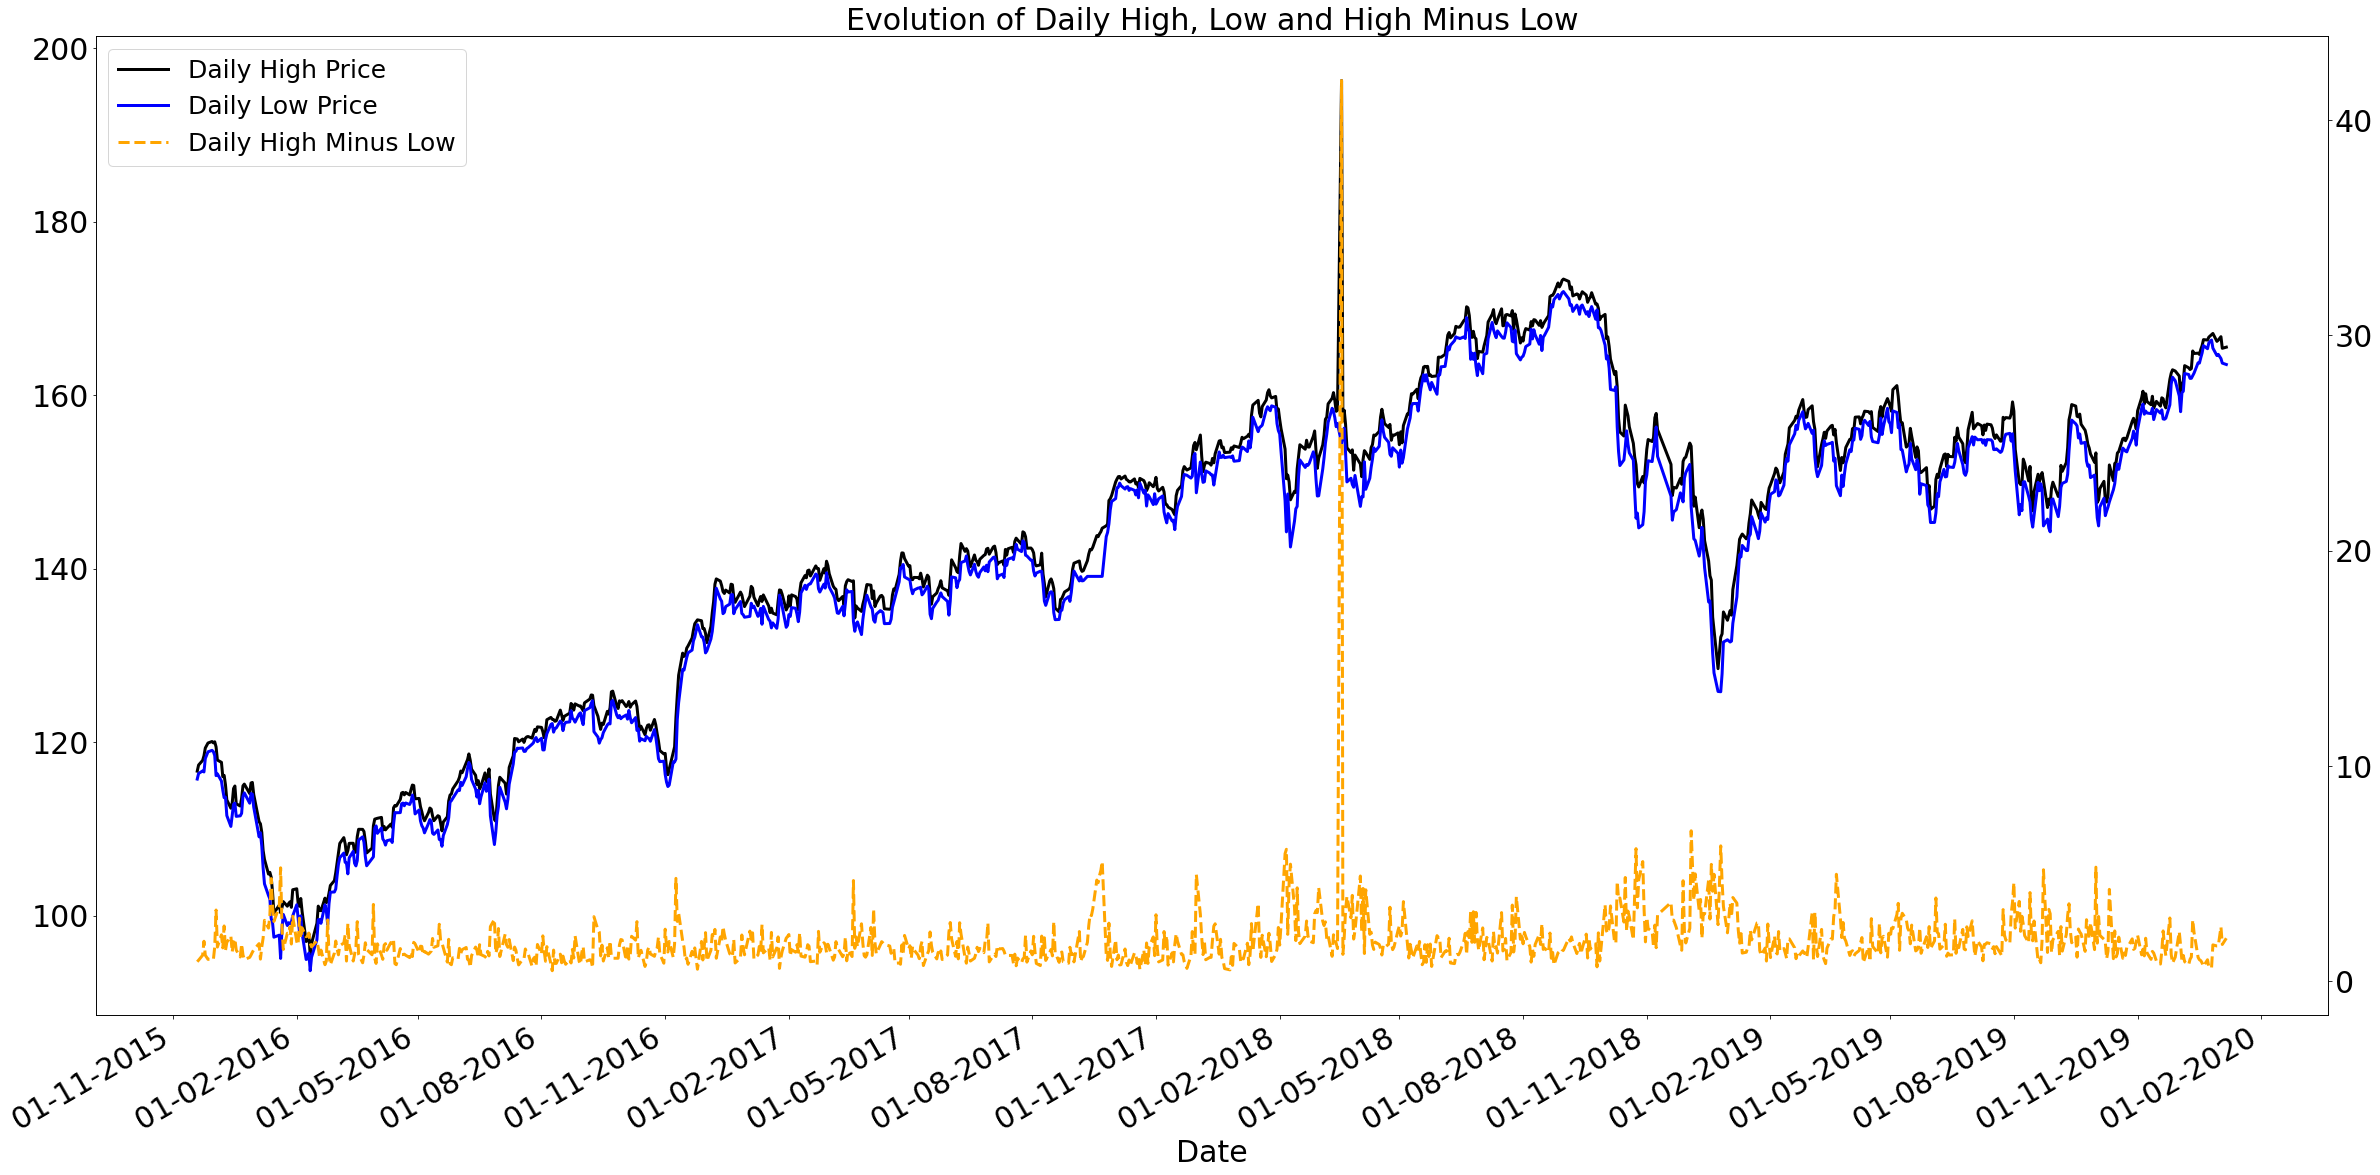

In [19]:
#Timeplot of Reported Daily High, Low and High Minus Low

plt.subplots(figsize=(40,20))

plt.title('Evolution of Daily High, Low and High Minus Low', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))


ax1 = df_corrected['High'].plot(color='black', label='Daily High Price', linewidth = 3)
ax2 = df_corrected['Low'].plot(color='blue', label='Daily Low Price', linewidth = 3)
ax3 = (df_corrected['High'] - df_corrected['Low']).plot(color='orange', secondary_y=True, label='Daily High Minus Low', linewidth = 3, linestyle = '--')
plt.yticks(fontsize = 30)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()

plt.legend(h1+h3, l1+l3, loc=2, prop={'size': 25})

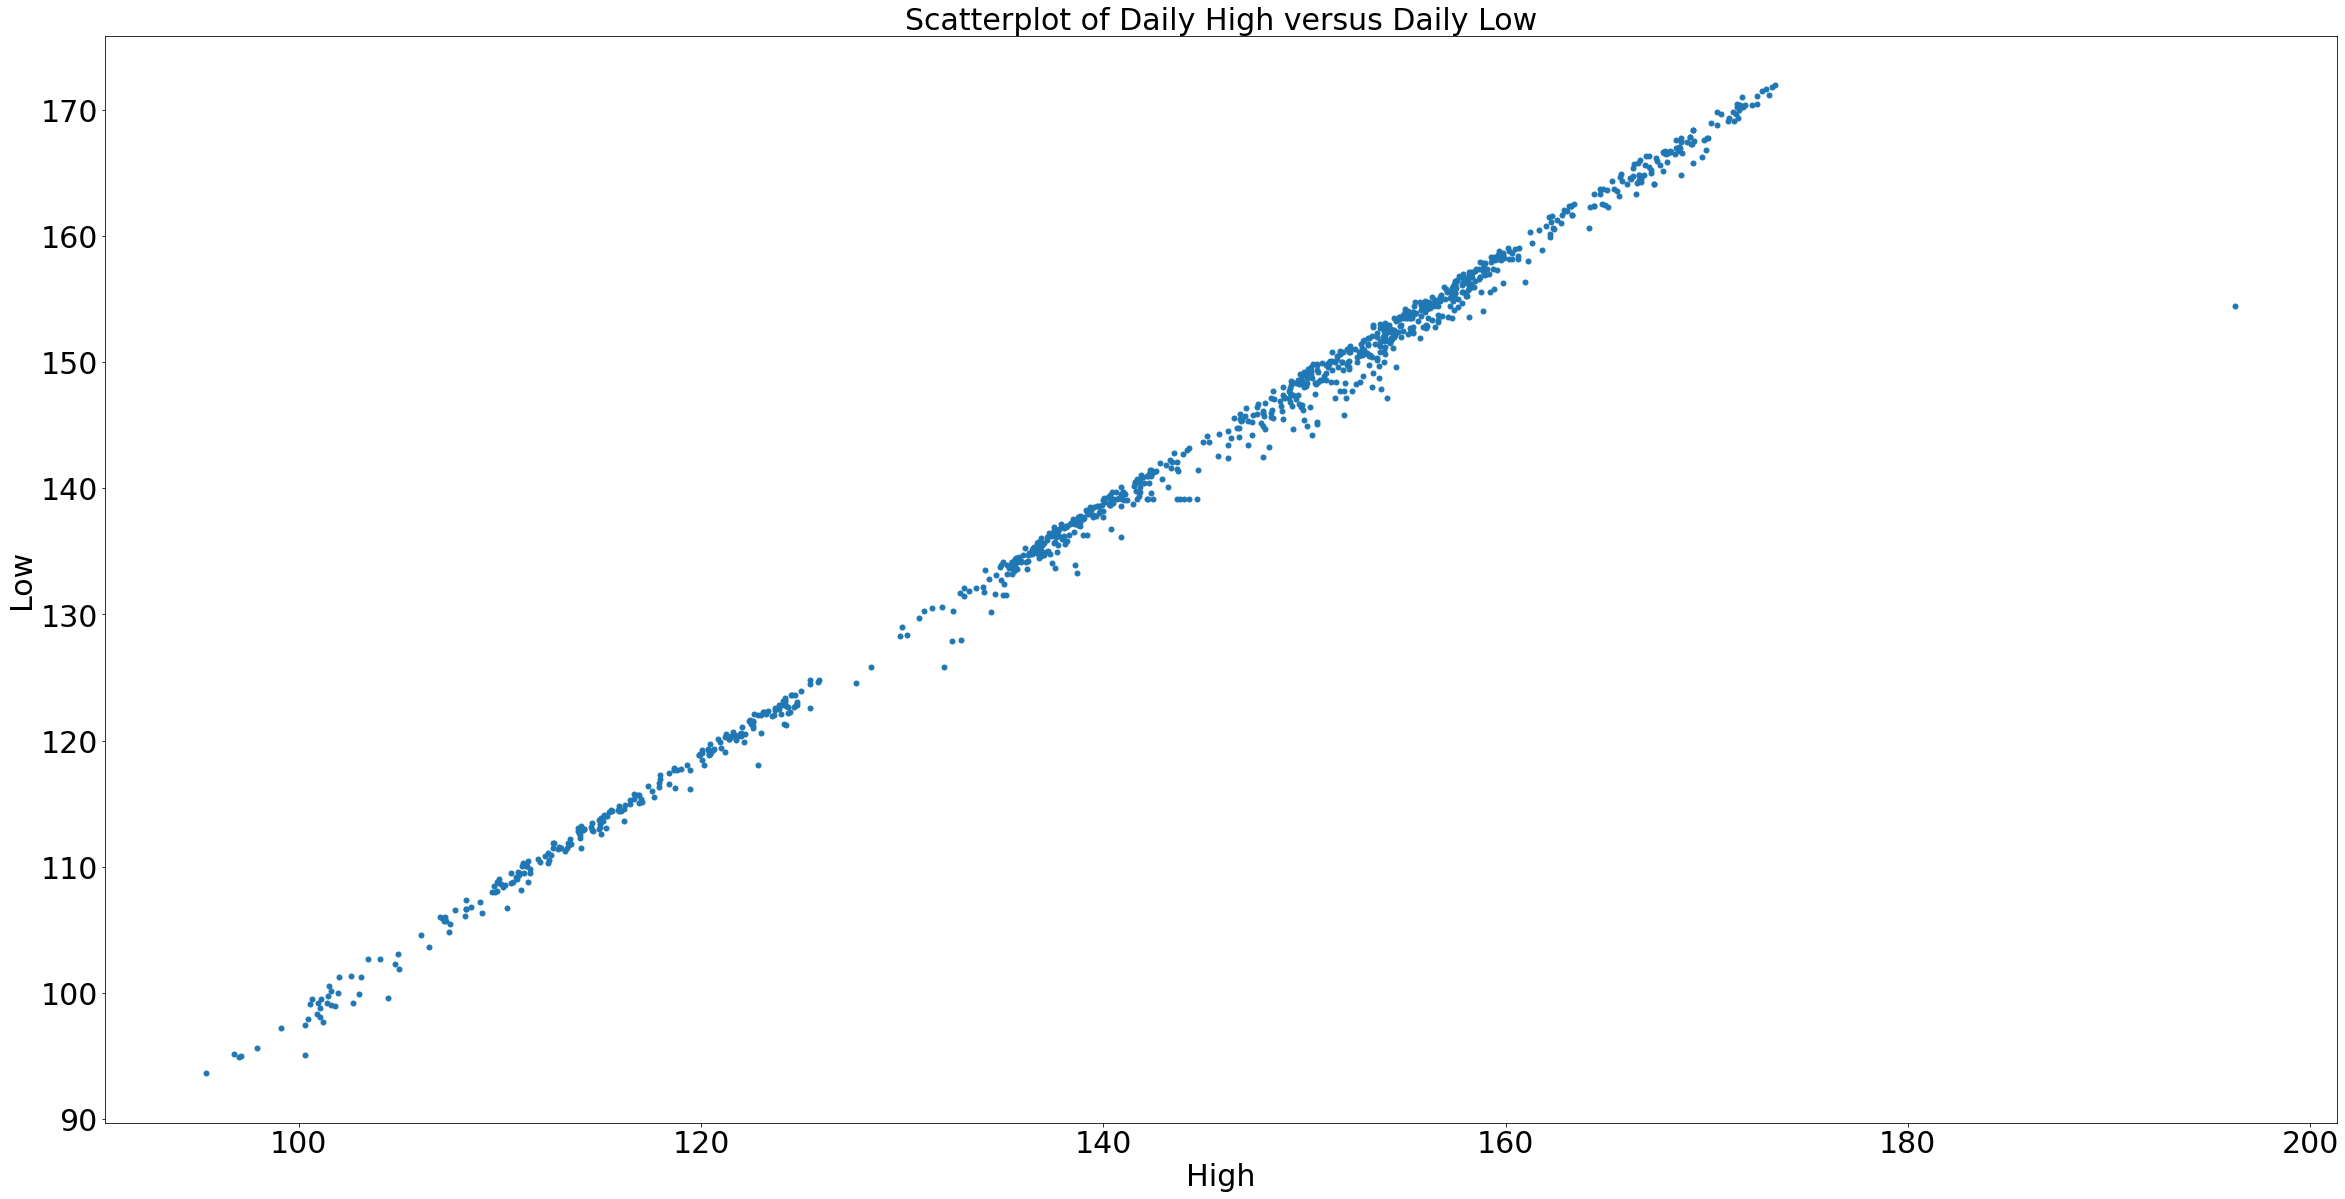

In [20]:
#Scatterplot of Reported Daily High and Low Prices

plt.subplots(figsize=(40,20))
plt.title('Scatterplot of Daily High versus Daily Low', fontsize = 30)

plt.xlabel('High', fontsize = 30), plt.ylabel('Low', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

plt.scatter(x = df_corrected['High'], y = df_corrected['Low'], s = 25)

In [21]:
print('Max High Price:', df_corrected['High'].max(), ', Date of Max High Price:', df_corrected.index[df_corrected['High'] == df_corrected['High'].max()][0])

Max High Price: 196.279999 , Date of Max High Price: 2018-03-19 00:00:00


The above timeplot shows the evolution of daily high and low prices as well as their difference over the time horizon under analysis.

High and low prices are normally in line with each other, as shown by the evolution of the High minus Low variable. However, on 19 March 2018, the high price spiked abruptly to nearly 200. There was no similar movement in the low price at that point, as a result of which the High minus Low variable also registered a spike. This is also reflected in the scatterplot of high and low prices.

Although it is possible for asset prices to register discontinuous spikes under rare market conditions, the extraordinary spike in both High and High minus Low on 19 March 2018 relative to other time points in the dataset makes it an outlier. However, in the absence of more data on trading volume etc, there is no sufficient basis to consider the datapoint to be incorrect or misreported.

Let us see whether Open and Close prices register similar trends.

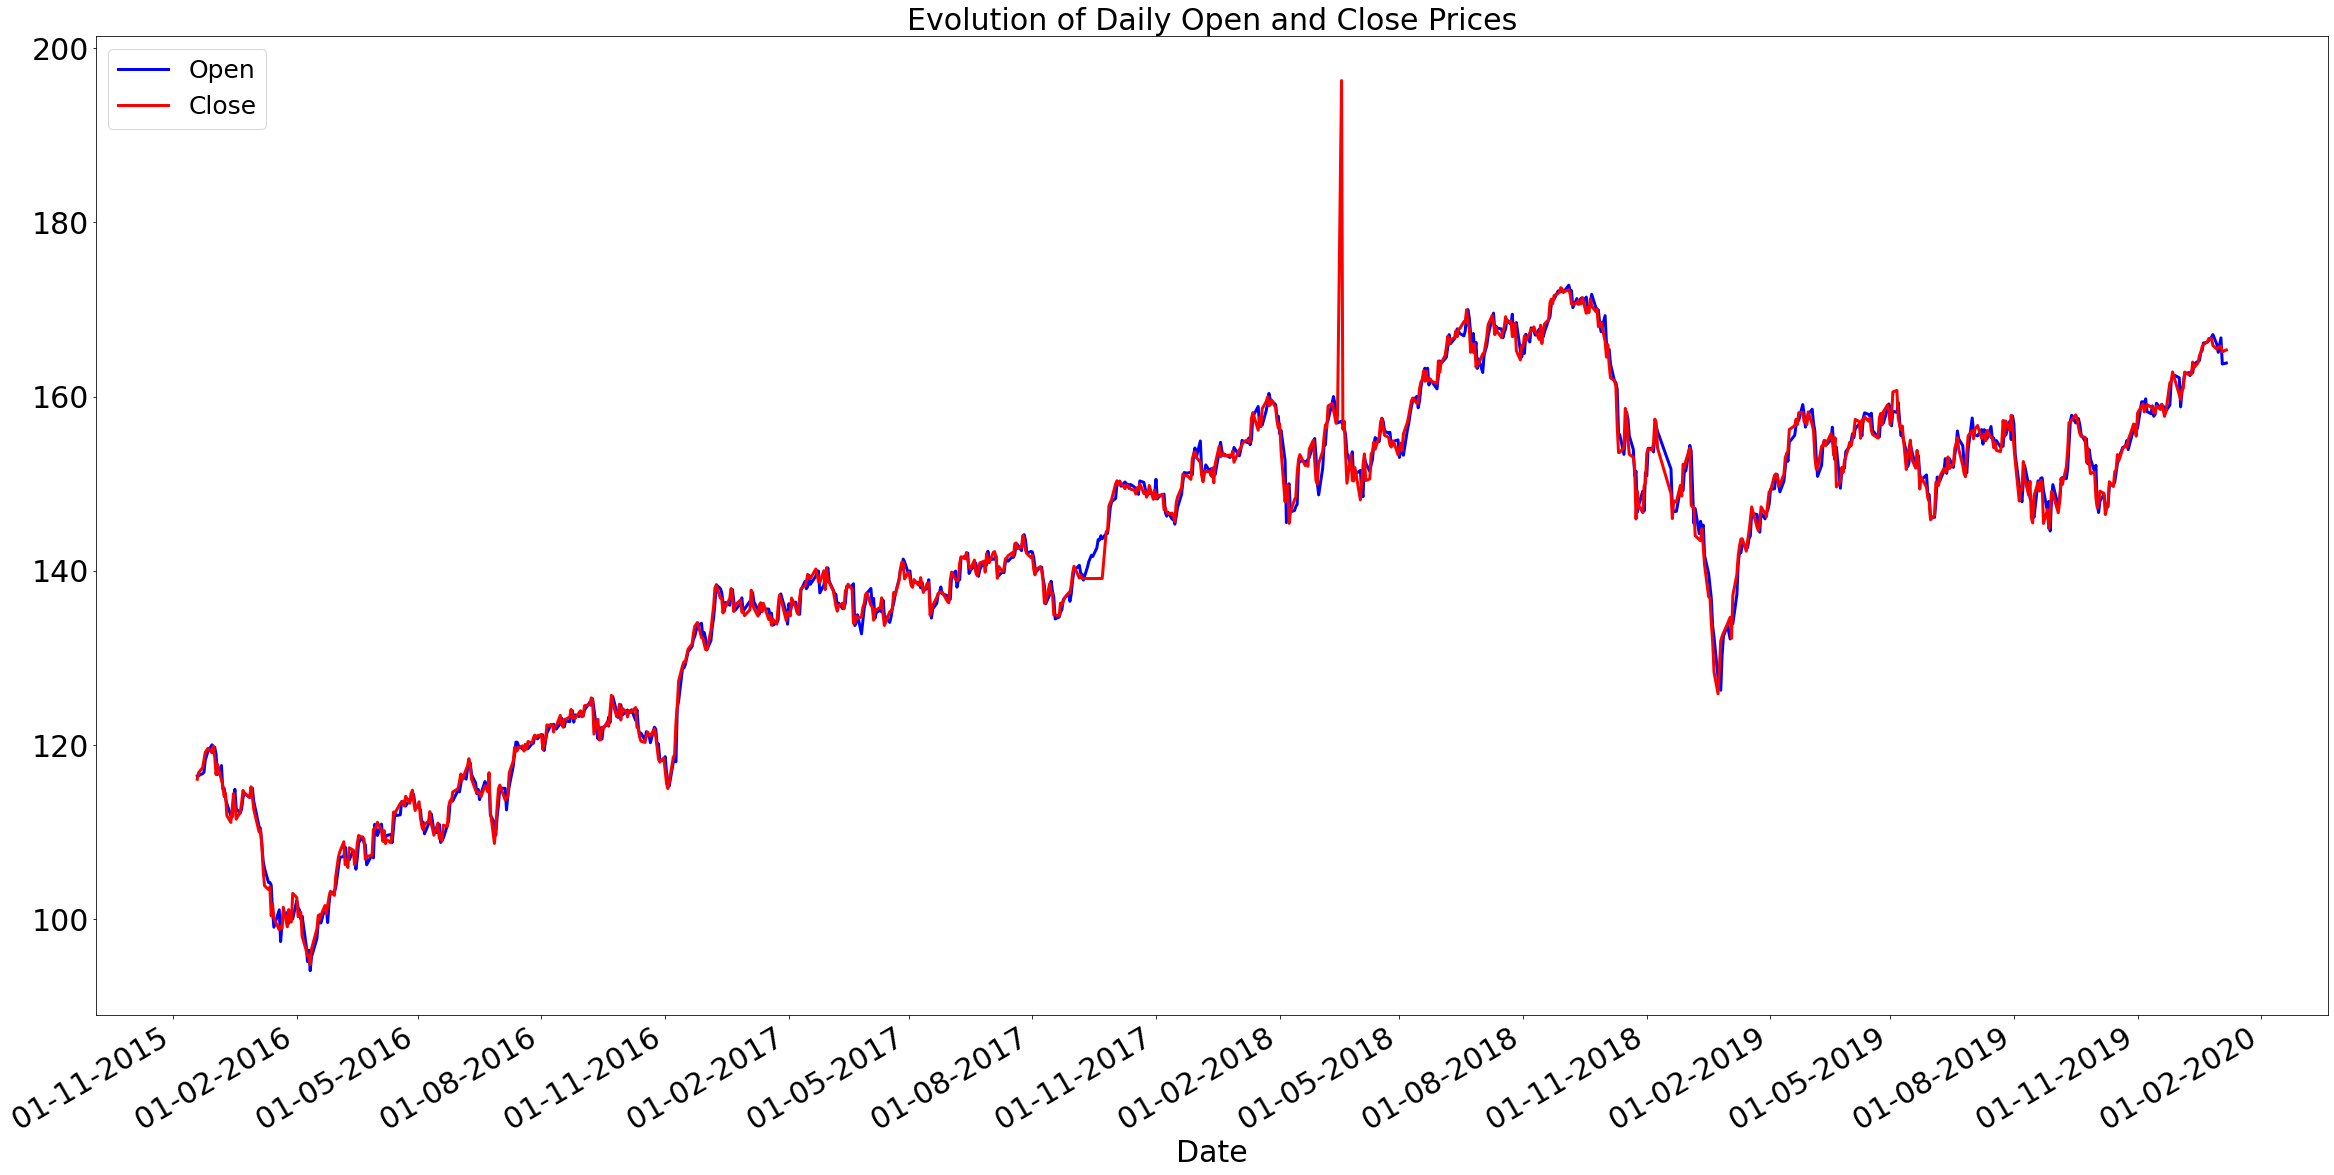

In [22]:
#Timeplot of Reported Daily Open and Close Prices
plt.subplots(figsize=(40,20))

plt.title('Evolution of Daily Open and Close Prices', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax4 = df_corrected['Open'].plot(color = 'blue', linewidth = 3)
ax5 = df_corrected['Close'].plot(color = 'red', linewidth = 3)


h4, l4 = ax4.get_legend_handles_labels()
h5, l5 = ax5.get_legend_handles_labels()

plt.legend(h4, l4, loc=2, prop={'size': 25})


The above chart shows that the closing price registered a spike on 19 March 2018, becoming the High price for that day. As stated earlier, occasional discontinuous jumps in asset prices are normal under extreme market conditions. In the absence of other information, we do not have sufficient basis to conclude that the data for this day is incorrect.



**Conclusion**: The above data visualisation exercise suggests that there is one outlier in the historical Open, Close, High and Low prices, viz. the closing price spike on 19 March 2018. However, sudden abrupt jumps in asset prices are possible under extreme market conditions. Therefore, in the absence of additional information, we leave this outlier unchanged and continue to include it in our dataframe.
___

## 1.5. Check 5 - Relationship Between Close and Adjusted Close

The Adj Close is calculated based on the Close after taking into account corporate events such as stock splits, stock dividends and M&A and divestment activity. It is typical for the relationship between Close and Adj Close to be stable over time, with Adj Close calculated from the closing price based on an adjustment factor.

We will move on with this assumption and will correct for deviations, if any, from the long-term relationship between these two variables captured in the historical data.

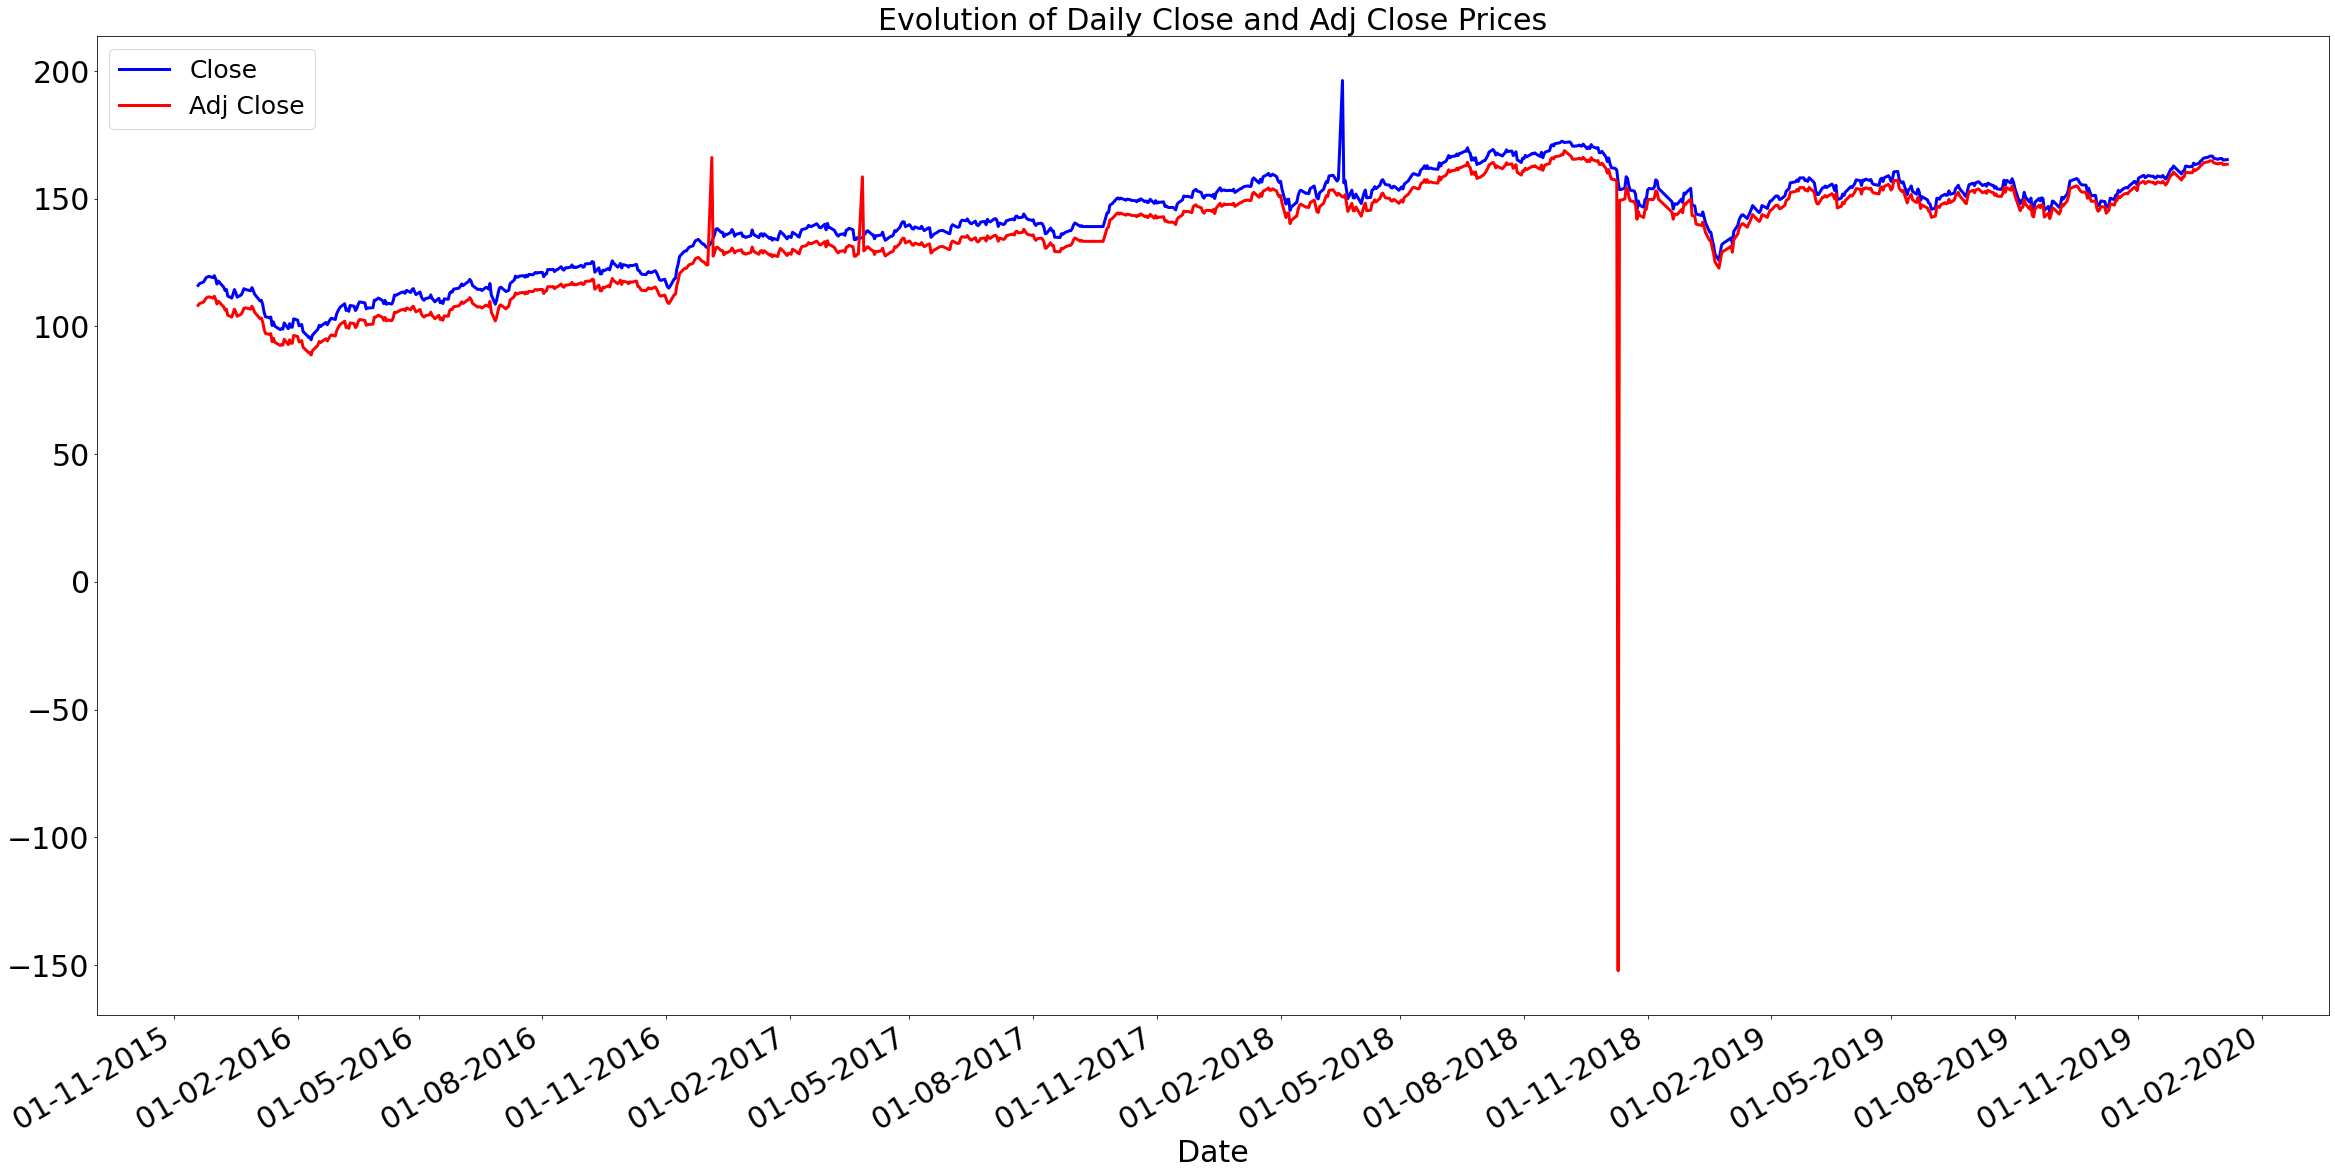

In [23]:
#Timeplot of Reported Daily Close and Adj Close Prices
plt.subplots(figsize=(40,20))

plt.title('Evolution of Daily Close and Adj Close Prices', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax6 = df_corrected['Close'].plot(color = 'blue', linewidth = 3)
ax7 = df_corrected['Adj Close'].plot(color = 'red', linewidth = 3)

h6, l6 = ax6.get_legend_handles_labels()
h7, l7 = ax7.get_legend_handles_labels()

plt.legend(h6, l6, loc=2, prop={'size': 25})

In [24]:
print('Negative Adj Close Price:', df_corrected['Adj Close'].min(), ', Date of Negative Adj Close Price:', df_corrected.index[df_corrected['Adj Close'] == df_corrected['Adj Close'].min()][0])

Negative Adj Close Price: -152.277847 , Date of Negative Adj Close Price: 2018-10-10 00:00:00


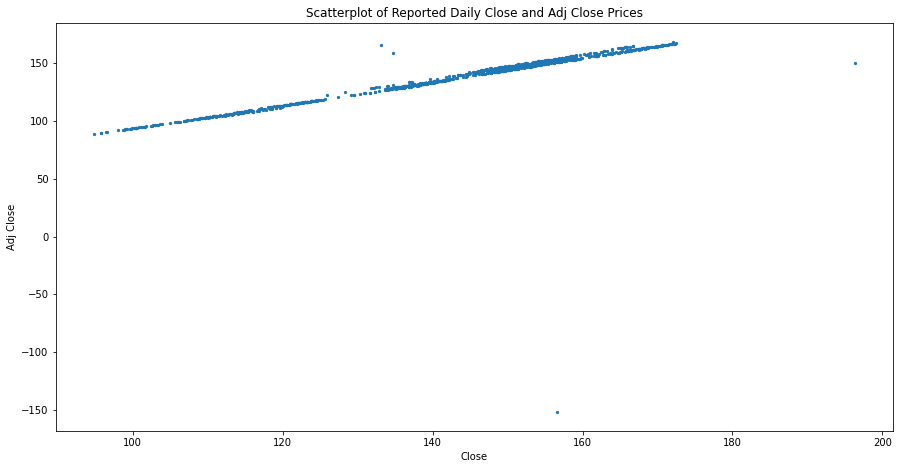

In [25]:
#Scatterplot of Reported Daily Close and Adj Close Prices
df_corrected.plot.scatter(x = 'Close', y = 'Adj Close', s = 5, title = 'Scatterplot of Reported Daily Close and Adj Close Prices', figsize = (15, 7.5))

The above timeplot and scatterplot show a negative Adj Close of -152.27 on 10 October 2018. This, along with two spikes between November 2016 and May 2017 appear to be oddities. We, therefore, use a simple linear regression model between Adj Close and Close to calculate the predicted values of Adj Close based on Close on these 3 dates. We then use these Adj Close values in our final analysis on signal effectiveness.

In [26]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

In [27]:
#Regression of Daily Adj Close on Close Prices
regression = sm.OLS(df_corrected['Adj Close'], sm.add_constant(df_corrected['Close']))
lin_reg_adjcl_on_cl = regression.fit()
lin_reg_adjcl_on_cl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4013.
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        02:48:26   Log-Likelihood:                -3850.0
No. Observations:                1043   AIC:                             7704.
Df Residuals:                    1041   BIC:                             7714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0705      2.332     -4.319      0.000     -14.646      -5.495
Close          1.0323      0.016     63.346      0.000       1.000       1.064
==============================================================================
Omnibus:                     2774.850   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36895149.194
Skew:                         -29.424   Prob(JB):                         0.00
Kurtosis:                     922.519   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

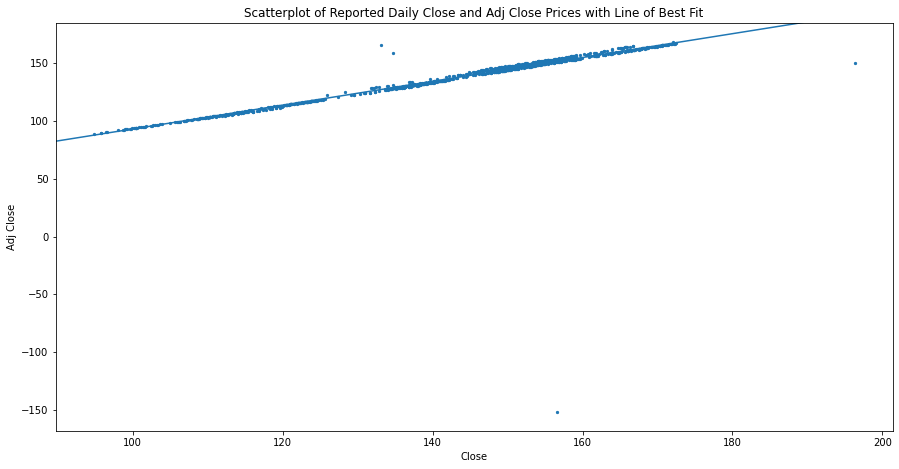

In [28]:
#Plotting the Line of Best Fit
scatter_close = df_corrected.plot.scatter(x = 'Close', y = 'Adj Close', s = 5, title = 'Scatterplot of Reported Daily Close and Adj Close Prices with Line of Best Fit', figsize = (15, 7.5))
reg_line = abline_plot(model_results = lin_reg_adjcl_on_cl, ax = scatter_close)

In [29]:
#Predicting Outlier Values for Adj Close Using the Linear Regression Model

df_corrected['Predicted Adj Close'] = lin_reg_adjcl_on_cl.predict()

df_adjclose_outliers = df_corrected.loc['2016-11-01':'2017-05-01'].loc[(df_corrected['Adj Close'] >= 150)]
df_adjclose_outliers = df_adjclose_outliers.append(df_corrected.loc[(df_corrected['Adj Close'] < 0)])
df_adjclose_outliers

Signal        Open        High         Low       Close  \
Date                                                                    
2016-12-05  16.011011  131.970001  133.330002  131.889999  133.149994   
2017-03-27  16.032241  132.759995  135.070007  132.399994  134.740005   
2018-10-10  19.719477  160.820007  160.990005  156.360001  156.559998   

             Adj Close  Predicted Adj Close  
Date                                         
2016-12-05  166.175079           127.375013  
2017-03-27  158.577637           129.016319  
2018-10-10 -152.277847           151.540243

Note that we do not use the predicted Adj Close for the maximum Close (around 200) because it lies outside the training set, and its prediction may not be very accurate.

In [30]:
#Dropping the Predicted Adj Close Column from df_corrected
df_corrected = df_corrected.drop(columns = ['Predicted Adj Close'])

In [31]:
#Replacing Orignal Adj Close Values for Outliers with Predicted Adj Close Values in df_corrected
for i in df_adjclose_outliers.index:
    df_corrected.loc[i, 'Adj Close'] = df_adjclose_outliers.loc[i, 'Predicted Adj Close']

df_corrected.loc[df_adjclose_outliers.index]

Signal        Open        High         Low       Close  \
Date                                                                    
2016-12-05  16.011011  131.970001  133.330002  131.889999  133.149994   
2017-03-27  16.032241  132.759995  135.070007  132.399994  134.740005   
2018-10-10  19.719477  160.820007  160.990005  156.360001  156.559998   

             Adj Close  
Date                    
2016-12-05  127.375013  
2017-03-27  129.016319  
2018-10-10  151.540243

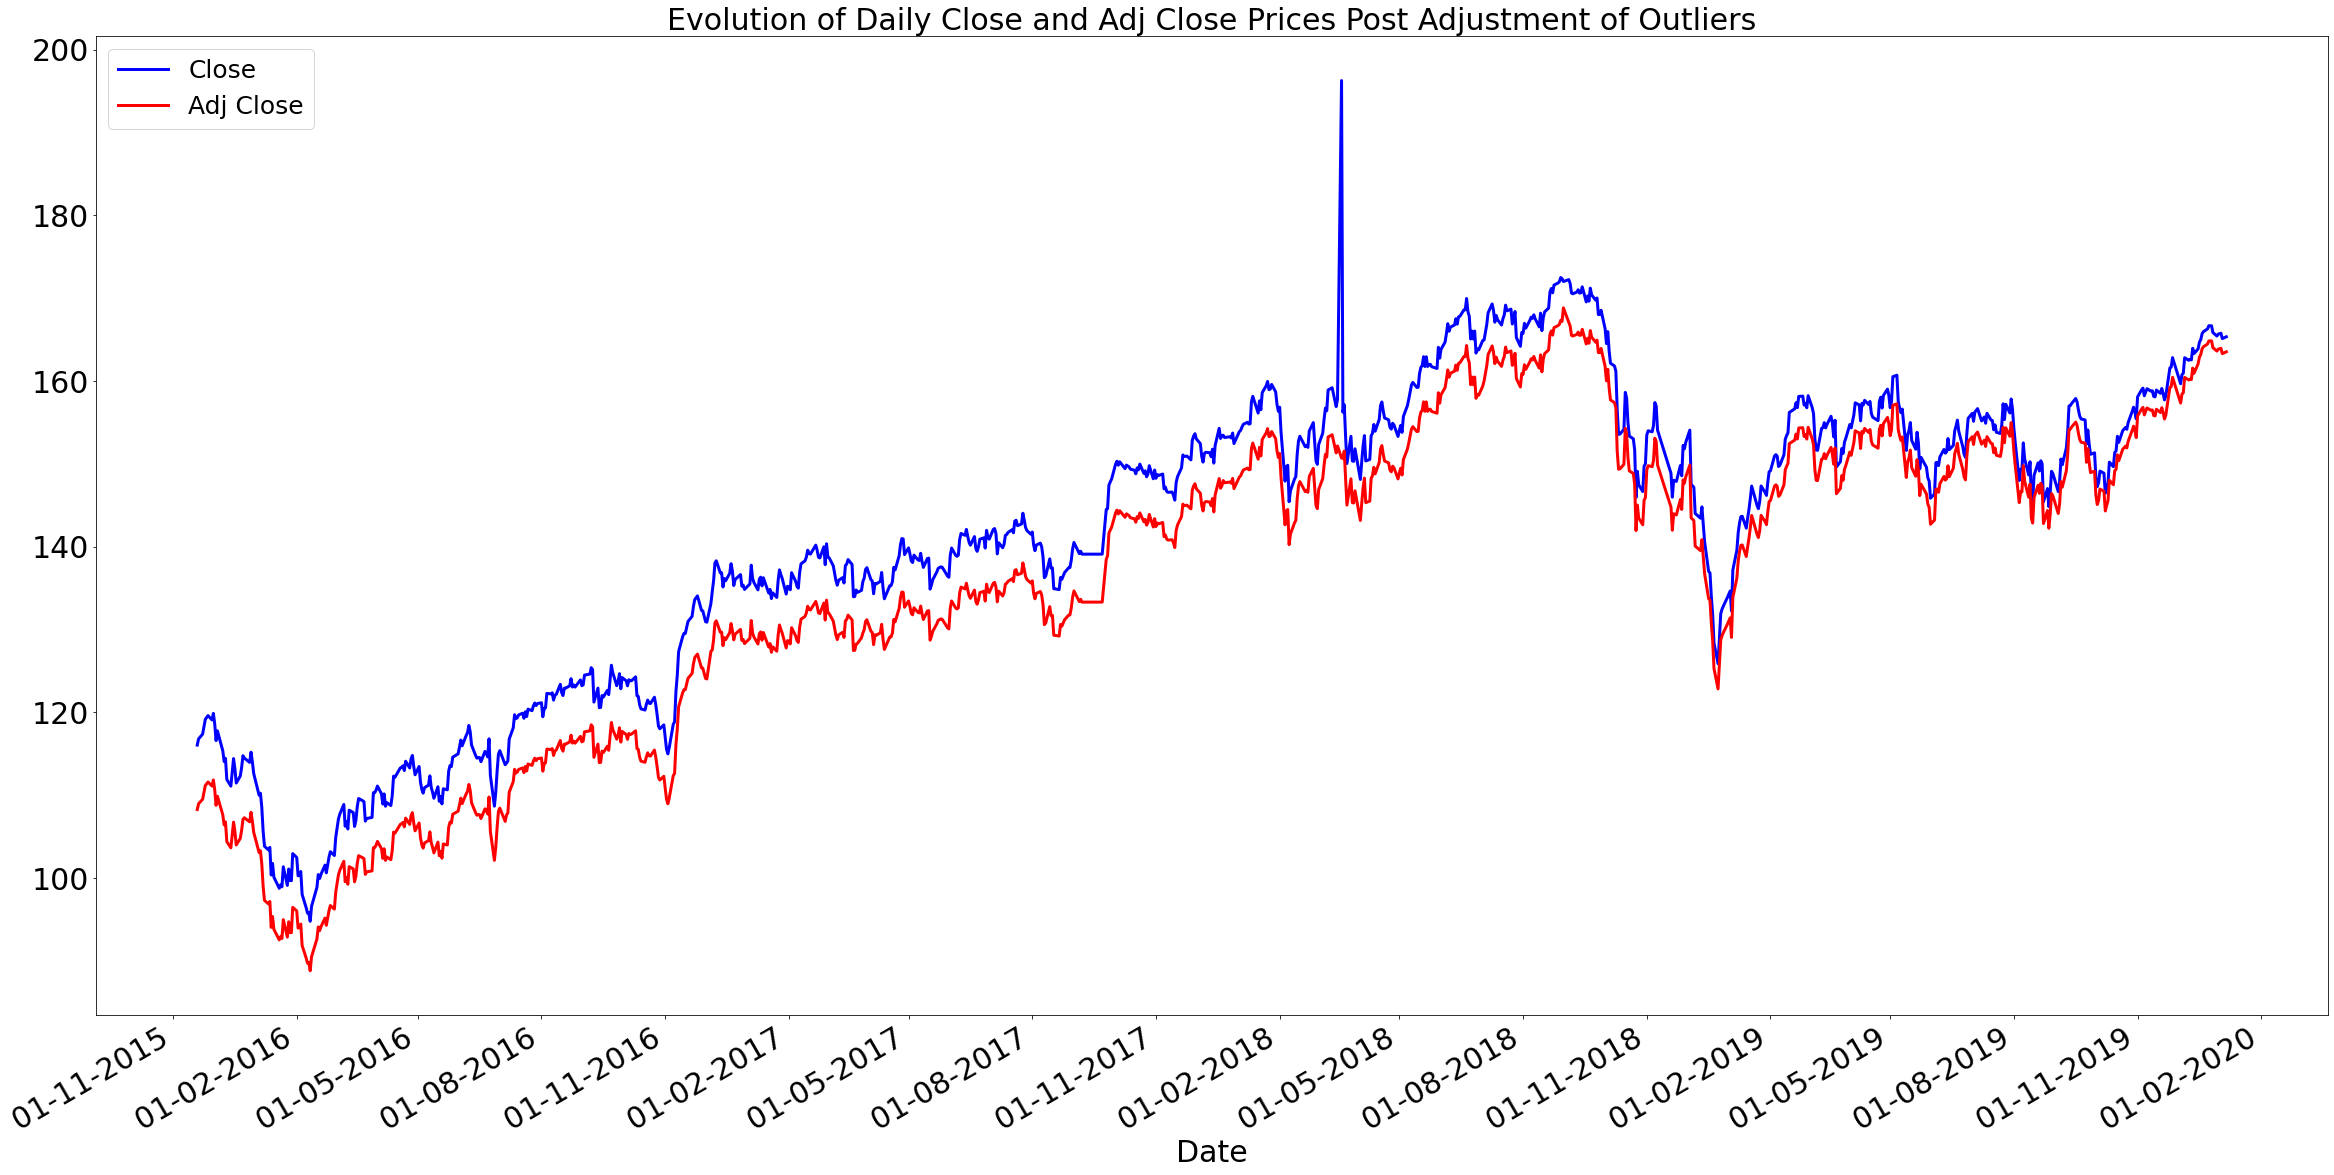

In [32]:
#Revised Timeplot of Daily Close and Adj Close Prices
plt.subplots(figsize=(40,20))

plt.title('Evolution of Daily Close and Adj Close Prices Post Adjustment of Outliers', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax8 = df_corrected['Close'].plot(color = 'blue', linewidth = 3)
ax9 = df_corrected['Adj Close'].plot(color = 'red', linewidth = 3)

h8, l8 = ax8.get_legend_handles_labels()
h9, l9 = ax9.get_legend_handles_labels()

plt.legend(h8, l8, loc=2, prop={'size': 25})

**Conclusion**: 3 outlier values for Adj Close have been idenified. We use a simple linear regression model between Adj Close and Close to calculate the predicted values of Adj Close based on Close for these outliers. The predicted Adj Close values for the outliers has been in our final analysis on signal effectiveness.
___

# 2. Signal Effectiveness Assessment

To assess the effectiveness of the provided signal data, we look at returns under the following 3 scenarios:
1. Portfolio based on the signal's return direction vs. a buy and hold portfolio
2. Portfolio based on the ETF's return direction and signal's return magnitude vs. portfolio based on the ETF's return direction and magnitude
3. Portfolio based on the signal's return direction and magnitude vs portfolio based on the ETF's return direction and magnitude

## 2.1. Evaluating Directional Predictability of Signal's Return

We start by assessing how accurately the signal's return predicts the direction the the actual Adj Close return. This accuracy can be captured in a simple long/short portfolio which goes long 1 unit if the signal's return is positive and goes short 1 unit if it is negative. Each time the signal's prediction does not match the sign of the actual return, the long/short portfolio is penalised relative to a simple buy and hold portfolio.

In [33]:
#Log Returns and Cumulated Value Based on 4sight Signal's Return Direction and ETF Adj Close
df_signal1 = pd.DataFrame()

df_signal1['Signal'] = df_corrected['Signal']
df_signal1['SRet_Dir'] = np.sign(np.log(df_signal1['Signal']/df_signal1['Signal'].shift(1)))

df_signal1['Adj Close'] = df_corrected['Adj Close']
df_signal1['Adj Close Log Return'] = np.log(df_signal1['Adj Close']/df_signal1['Adj Close'].shift(1))

df_signal1['B&H Portfolio'] = np.exp((df_signal1['Adj Close Log Return']).cumsum())
df_signal1['SRet_Dir Portfolio'] = np.exp((df_signal1['Adj Close Log Return'] * df_signal1['SRet_Dir']).cumsum())


df_signal1.loc['2015-11-19', 'SRet_Dir Portfolio'] = 1
df_signal1.loc['2015-11-19', 'B&H Portfolio'] = 1

df_signal1


Signal  SRet_Dir   Adj Close  Adj Close Log Return  \
Date                                                                
2015-11-19  13.768540       NaN  108.281601                   NaN   
2015-11-20  13.608819      -1.0  108.981323              0.006441   
2015-11-23  12.990589      -1.0  109.522453              0.004953   
2015-11-24  12.667435      -1.0  110.324837              0.007299   
2015-11-25  13.019910       1.0  111.183159              0.007750   
2015-11-27  12.879819      -1.0  111.602997              0.003769   
2015-11-30  13.184791       1.0  111.117851             -0.004357   
2015-12-01  12.922631      -1.0  111.854897              0.006611   
2015-12-02  13.118076       1.0  110.651367             -0.010818   
2015-12-03  12.916540      -1.0  108.785408             -0.017007   
2015-12-04  13.155278       1.0  109.886322              0.010069   
2015-12-07  12.430221      -1.0  108.234947             -0.015142   
2015-12-08  13.030335       1.0  107.637833             -0.005532   
2015-12-09  12.439604      -1.0  106.434288             -0.011244   
2015-12-10  13.249671       1.0  106.788841              0.003326   
2015-12-11  13.067526      -1.0  104.409737             -0.022530   
2015-12-14  13.054955      -1.0  103.663368             -0.007174   
2015-12-15  12.231405      -1.0  105.156120              0.014297   
2015-12-16  13.078074       1.0  106.760834              0.015145   
2015-12-17  12.436579      -1.0  105.622612             -0.010719   
2015-12-18  13.107495       1.0  104.008545             -0.015399   
2015-12-21  12.488531      -1.0  104.792259              0.007507   
2015-12-22  12.943330       1.0  105.753227              0.009128   
2015-12-23  12.953485       1.0  107.087379              0.012537   
2015-12-24  12.566589      -1.0  107.289787              0.001888   
2015-12-28  13.169915       1.0  106.793152             -0.004640   
2015-12-29  12.988398      -1.0  107.945709              0.010735   
2015-12-30  12.644827      -1.0  106.858749             -0.010121   
2015-12-31  11.963824      -1.0  105.528168             -0.012530   
2016-01-04  12.475992       1.0  103.082527             -0.023448   
2016-01-05  11.093390      -1.0  103.307411              0.002179   
2016-01-06  11.161586       1.0  101.733200             -0.015355   
2016-01-07  12.011354       1.0   99.015808             -0.027074   
2016-01-08  10.722719      -1.0   97.310440             -0.017373   
2016-01-11  11.328934       1.0   96.888771             -0.004343   
2016-01-12  10.807525      -1.0   97.179237              0.002993   
2016-01-13  11.661341       1.0   94.058937             -0.032636   
2016-01-14  11.709747       1.0   95.361397              0.013752   
2016-01-15  11.682590      -1.0   93.815323             -0.016346   
2016-01-19  10.942456      -1.0   92.550323             -0.013576   
2016-01-20  11.479756       1.0   92.934502              0.004142   
2016-01-21  10.913312      -1.0   92.718971             -0.002322   
2016-01-22  11.435968       1.0   94.986595              0.024163   
2016-01-25  11.433675      -1.0   92.878281             -0.022446   
2016-01-26  11.577177       1.0   94.733612              0.019779   
2016-01-27  11.639571       1.0   93.431114             -0.013844   
2016-01-28  10.712037      -1.0   93.412376             -0.000201   
2016-01-29  10.725925       1.0   96.476471              0.032275   
2016-02-01  11.901013       1.0   96.036064             -0.004575   
2016-02-02  10.582996      -1.0   93.965240             -0.021799   
2016-02-03  10.626061       1.0   94.087059              0.001296   
2016-02-04  10.662134       1.0   94.452484              0.003876   
2016-02-05  11.206475       1.0   91.866287             -0.027763   
2016-02-08  11.191439      -1.0   90.357658             -0.016558   
2016-02-09  10.643693      -1.0   89.748604             -0.006763   
2016-02-10  11.451959       1.0   89.795471              0.000522   
2016-02-11  1

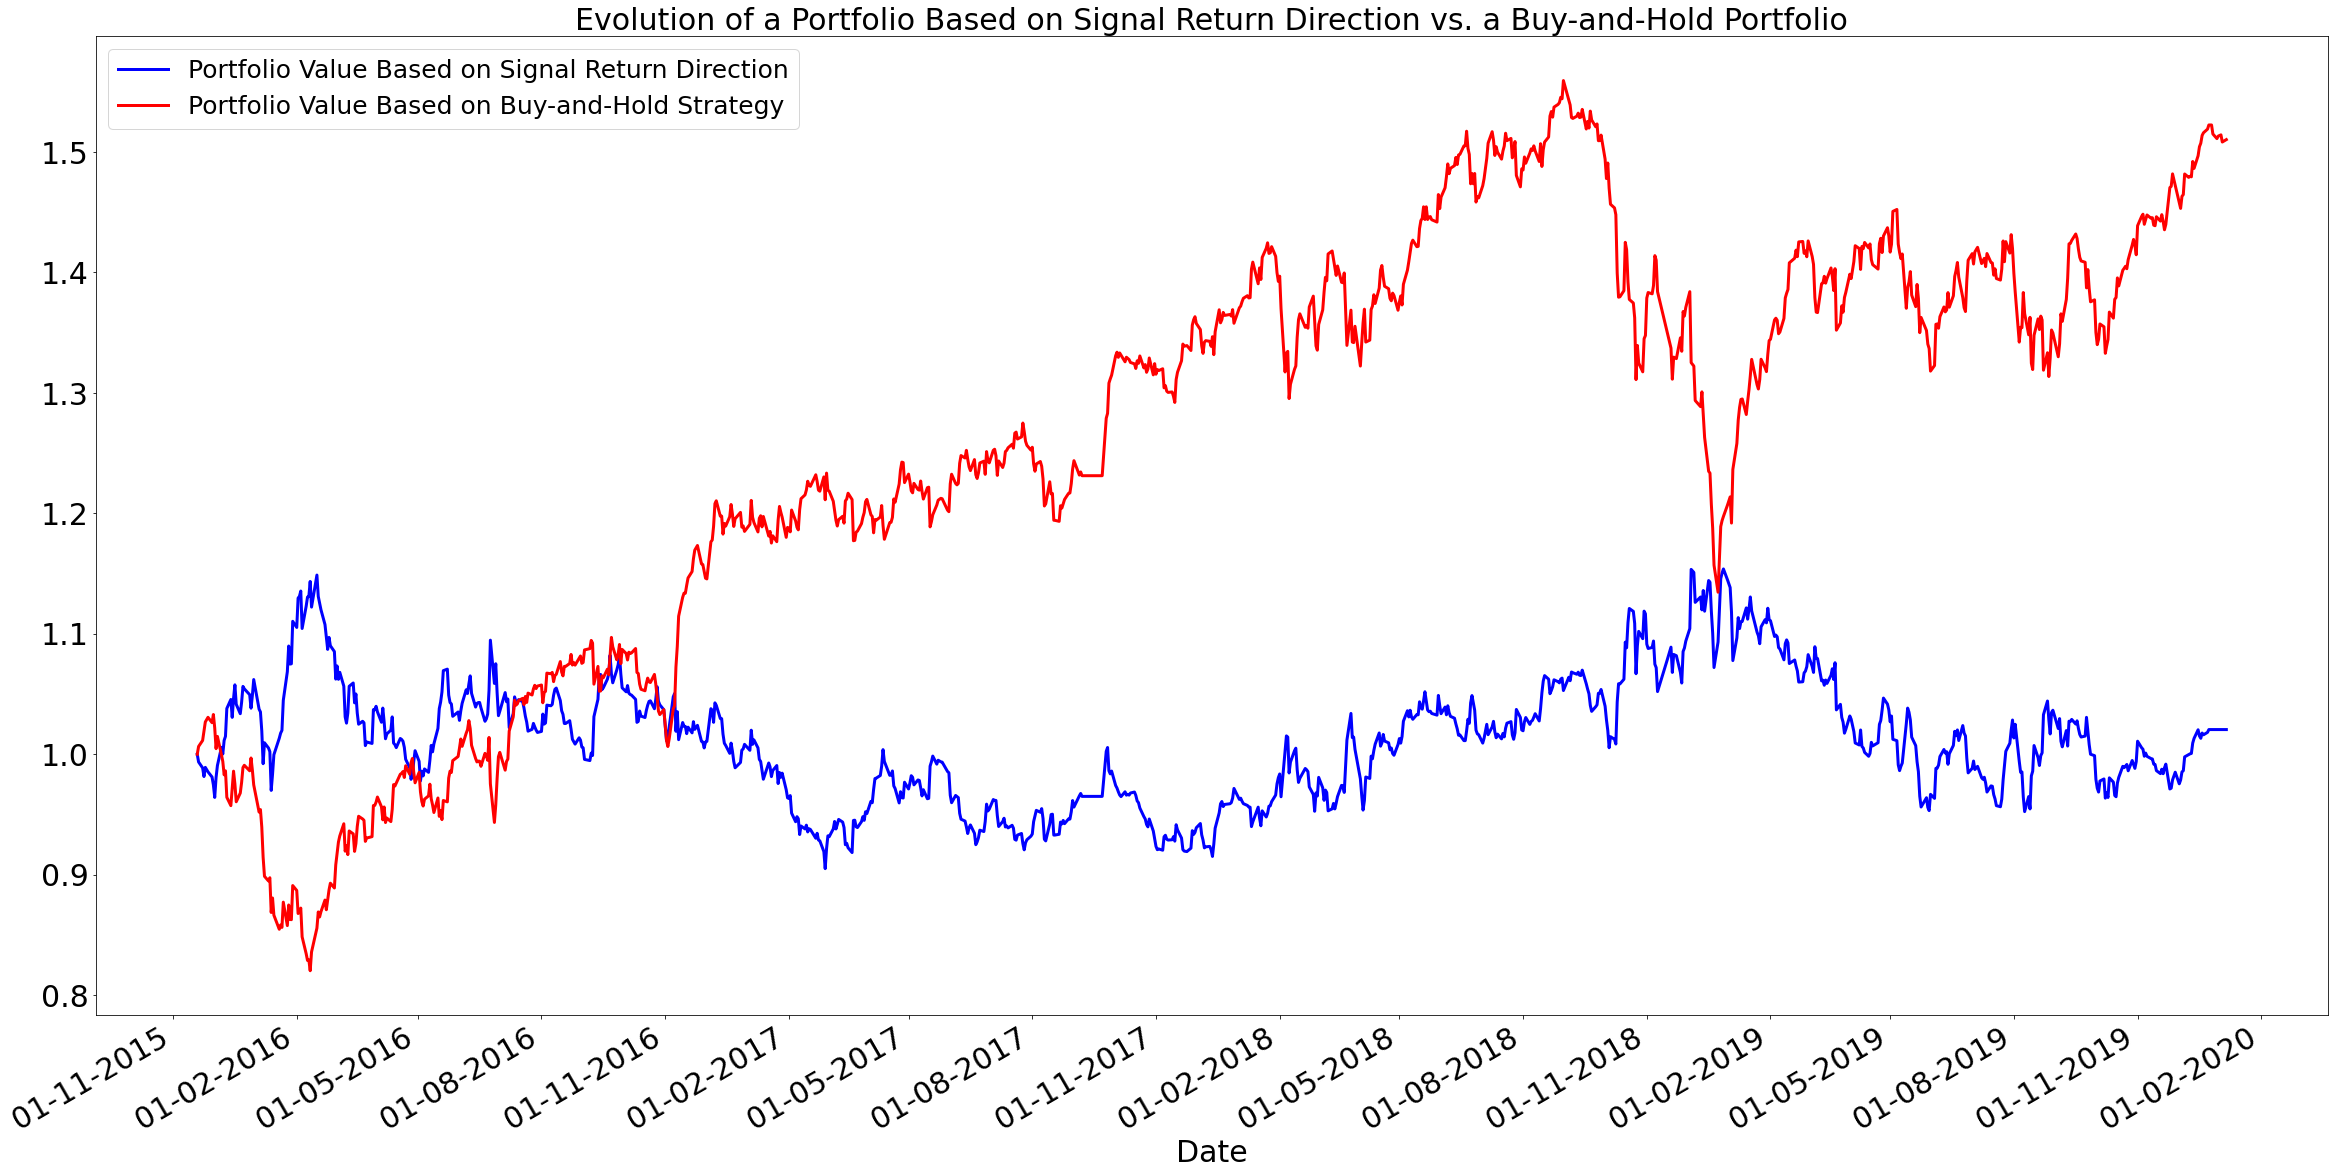

In [34]:
#Evolution of a Portfolio Based on Signal Return Direction vs. a Buy-and-Hold Portfolio
plt.subplots(figsize = (40,20))

plt.title('Evolution of a Portfolio Based on Signal Return Direction vs. a Buy-and-Hold Portfolio', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax10 = df_signal1['SRet_Dir Portfolio'].plot(color = 'blue', label = 'Portfolio Value Based on Signal Return Direction' , linewidth = 3)
ax11 = df_signal1['B&H Portfolio'].plot(color = 'red', label = 'Portfolio Value Based on Buy-and-Hold Strategy' , linewidth = 3)

h10, l10 = ax10.get_legend_handles_labels()
h11, l11 = ax11.get_legend_handles_labels()

plt.legend(h10, l10, loc=2, prop={'size': 25})

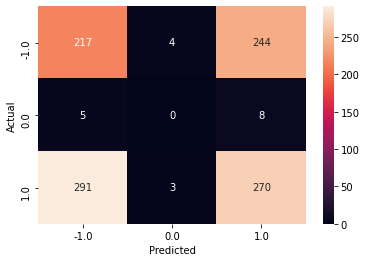

In [35]:
#Confusion Matrix
etf_return_direction = np.sign(df_signal1['Adj Close Log Return'])
confusion_matrix1 = pd.crosstab(etf_return_direction[1 : ], df_signal1['SRet_Dir'][1 : ], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix1, annot=True, fmt='g')

**Conclusion**: Since the portfolio based on the signal performs poorly relative to a comparable strategy independent of the signal (i.e. the buy-and-hold portfolio), the signal's return direction predictability is pretty weak. This is also confirmed by the confusion matrix shown above.

Based on the chart, the signal seems to do well in predicting bear markets but does a poor job in predicting bull runs, except for the one between 1 November 2017 and 1 August 2018. But the magnitude of signal's response seems weak during this phase of exception.

Although the signal does a poor job in predicting the ETF's direction, we incorporate information provided by the signal returns' magnitude to see if that improves its overall effectiveness.
___

## 2.2. Comparing Portfolio Returns Based on Signal's Return Magnitude and ETF's Return Direction with those Based on the ETF's Return Magnitude and Direction

We now leave aside the information provided by signal returns' direction (already analysed above) and focus on their magnitude. This is done by constructing a portfolio whose # of units invested in the ETF each day is simply determined by the level of signal return that day (so, 5 units if the return is 5%). This portfolio is then compared to one whose # of units invested daily is determined by the daily level of ETF Adj Close return. For both portfolios, the direction (i.e. long/ short) is determined by the sign of the daily ETF Adj Close return.

A confusion matrix would not make sense here since the direction of both portfolios is influenced by the same variable.

In [36]:
#Evolution of a Portfolio Based on Signal's Return Magnitude vs. Portfolio Based on the ETF's Return Magnitude

df_signal2 = pd.DataFrame()

df_signal2['Signal'] = df_corrected['Signal']
df_signal2['SRet_Mag'] = 100 * abs(np.log(df_signal2['Signal']/df_signal2['Signal'].shift(1)))

df_signal2['Adj Close'] = df_corrected['Adj Close']
df_signal2['Adj Close Log Return'] = np.log(df_signal2['Adj Close']/df_signal2['Adj Close'].shift(1))
df_signal2['ETFRet_Mag'] = 100 * abs(df_signal2['Adj Close Log Return'])

df_signal2['ETFRet_Mag Portfolio'] = np.exp((df_signal2['Adj Close Log Return'] * df_signal2['ETFRet_Mag']).cumsum())
df_signal2['SRet_Mag Portfolio'] = np.exp((df_signal2['Adj Close Log Return'] * df_signal2['SRet_Mag']).cumsum())


df_signal2.loc['2015-11-19', 'ETFRet_Mag Portfolio'] = 1
df_signal2.loc['2015-11-19', 'SRet_Mag Portfolio'] = 1

df_signal2

Signal   SRet_Mag   Adj Close  Adj Close Log Return  \
Date                                                                 
2015-11-19  13.768540        NaN  108.281601                   NaN   
2015-11-20  13.608819   1.166824  108.981323              0.006441   
2015-11-23  12.990589   4.649285  109.522453              0.004953   
2015-11-24  12.667435   2.519063  110.324837              0.007299   
2015-11-25  13.019910   2.744520  111.183159              0.007750   
2015-11-27  12.879819   1.081805  111.602997              0.003769   
2015-11-30  13.184791   2.340233  111.117851             -0.004357   
2015-12-01  12.922631   2.008385  111.854897              0.006611   
2015-12-02  13.118076   1.501094  110.651367             -0.010818   
2015-12-03  12.916540   1.548244  108.785408             -0.017007   
2015-12-04  13.155278   1.831439  109.886322              0.010069   
2015-12-07  12.430221   5.669235  108.234947             -0.015142   
2015-12-08  13.030335   4.714942  107.637833             -0.005532   
2015-12-09  12.439604   4.639485  106.434288             -0.011244   
2015-12-10  13.249671   6.308746  106.788841              0.003326   
2015-12-11  13.067526   1.384250  104.409737             -0.022530   
2015-12-14  13.054955   0.096248  103.663368             -0.007174   
2015-12-15  12.231405   6.516093  105.156120              0.014297   
2015-12-16  13.078074   6.693027  106.760834              0.015145   
2015-12-17  12.436579   5.029499  105.622612             -0.010719   
2015-12-18  13.107495   5.254213  104.008545             -0.015399   
2015-12-21  12.488531   4.837350  104.792259              0.007507   
2015-12-22  12.943330   3.576988  105.753227              0.009128   
2015-12-23  12.953485   0.078427  107.087379              0.012537   
2015-12-24  12.566589   3.032325  107.289787              0.001888   
2015-12-28  13.169915   4.689347  106.793152             -0.004640   
2015-12-29  12.988398   1.387856  107.945709              0.010735   
2015-12-30  12.644827   2.680832  106.858749             -0.010121   
2015-12-31  11.963824   5.536075  105.528168             -0.012530   
2016-01-04  12.475992   4.191869  103.082527             -0.023448   
2016-01-05  11.093390  11.745669  103.307411              0.002179   
2016-01-06  11.161586   0.612865  101.733200             -0.015355   
2016-01-07  12.011354   7.337424   99.015808             -0.027074   
2016-01-08  10.722719  11.348760   97.310440             -0.017373   
2016-01-11  11.328934   5.499524   96.888771             -0.004343   
2016-01-12  10.807525   4.711731   97.179237              0.002993   
2016-01-13  11.661341   7.603649   94.058937             -0.032636   
2016-01-14  11.709747   0.414244   95.361397              0.013752   
2016-01-15  11.682590   0.232186   93.815323             -0.016346   
2016-01-19  10.942456   6.544948   92.550323             -0.013576   
2016-01-20  11.479756   4.793485   92.934502              0.004142   
2016-01-21  10.913312   5.060176   92.718971             -0.002322   
2016-01-22  11.435968   4.678017   94.986595              0.024163   
2016-01-25  11.433675   0.020057   92.878281             -0.022446   
2016-01-26  11.577177   1.247269   94.733612              0.019779   
2016-01-27  11.639571   0.537496   93.431114             -0.013844   
2016-01-28  10.712037   8.304249   93.412376             -0.000201   
2016-01-29  10.725925   0.129559   96.476471              0.032275   
2016-02-01  11.901013  10.395984   96.036064             -0.004575   
2016-02-02  10.582996  11.737493   93.965240             -0.021799   
2016-02-03  10.626061   0.406094   94.087059              0.001296   
2016-02-04  10.662134   0.338907   94.452484              0.003876   
2016-02-05  11.206475   4.979312   91.866287             -0.027763   
2016-02-08  11.191439   0.134259   90.357658             -0.016558   
2016-02-09  10.643693   5.018165   89.748604             -0.006763   
2016-02-10  11.451959   7

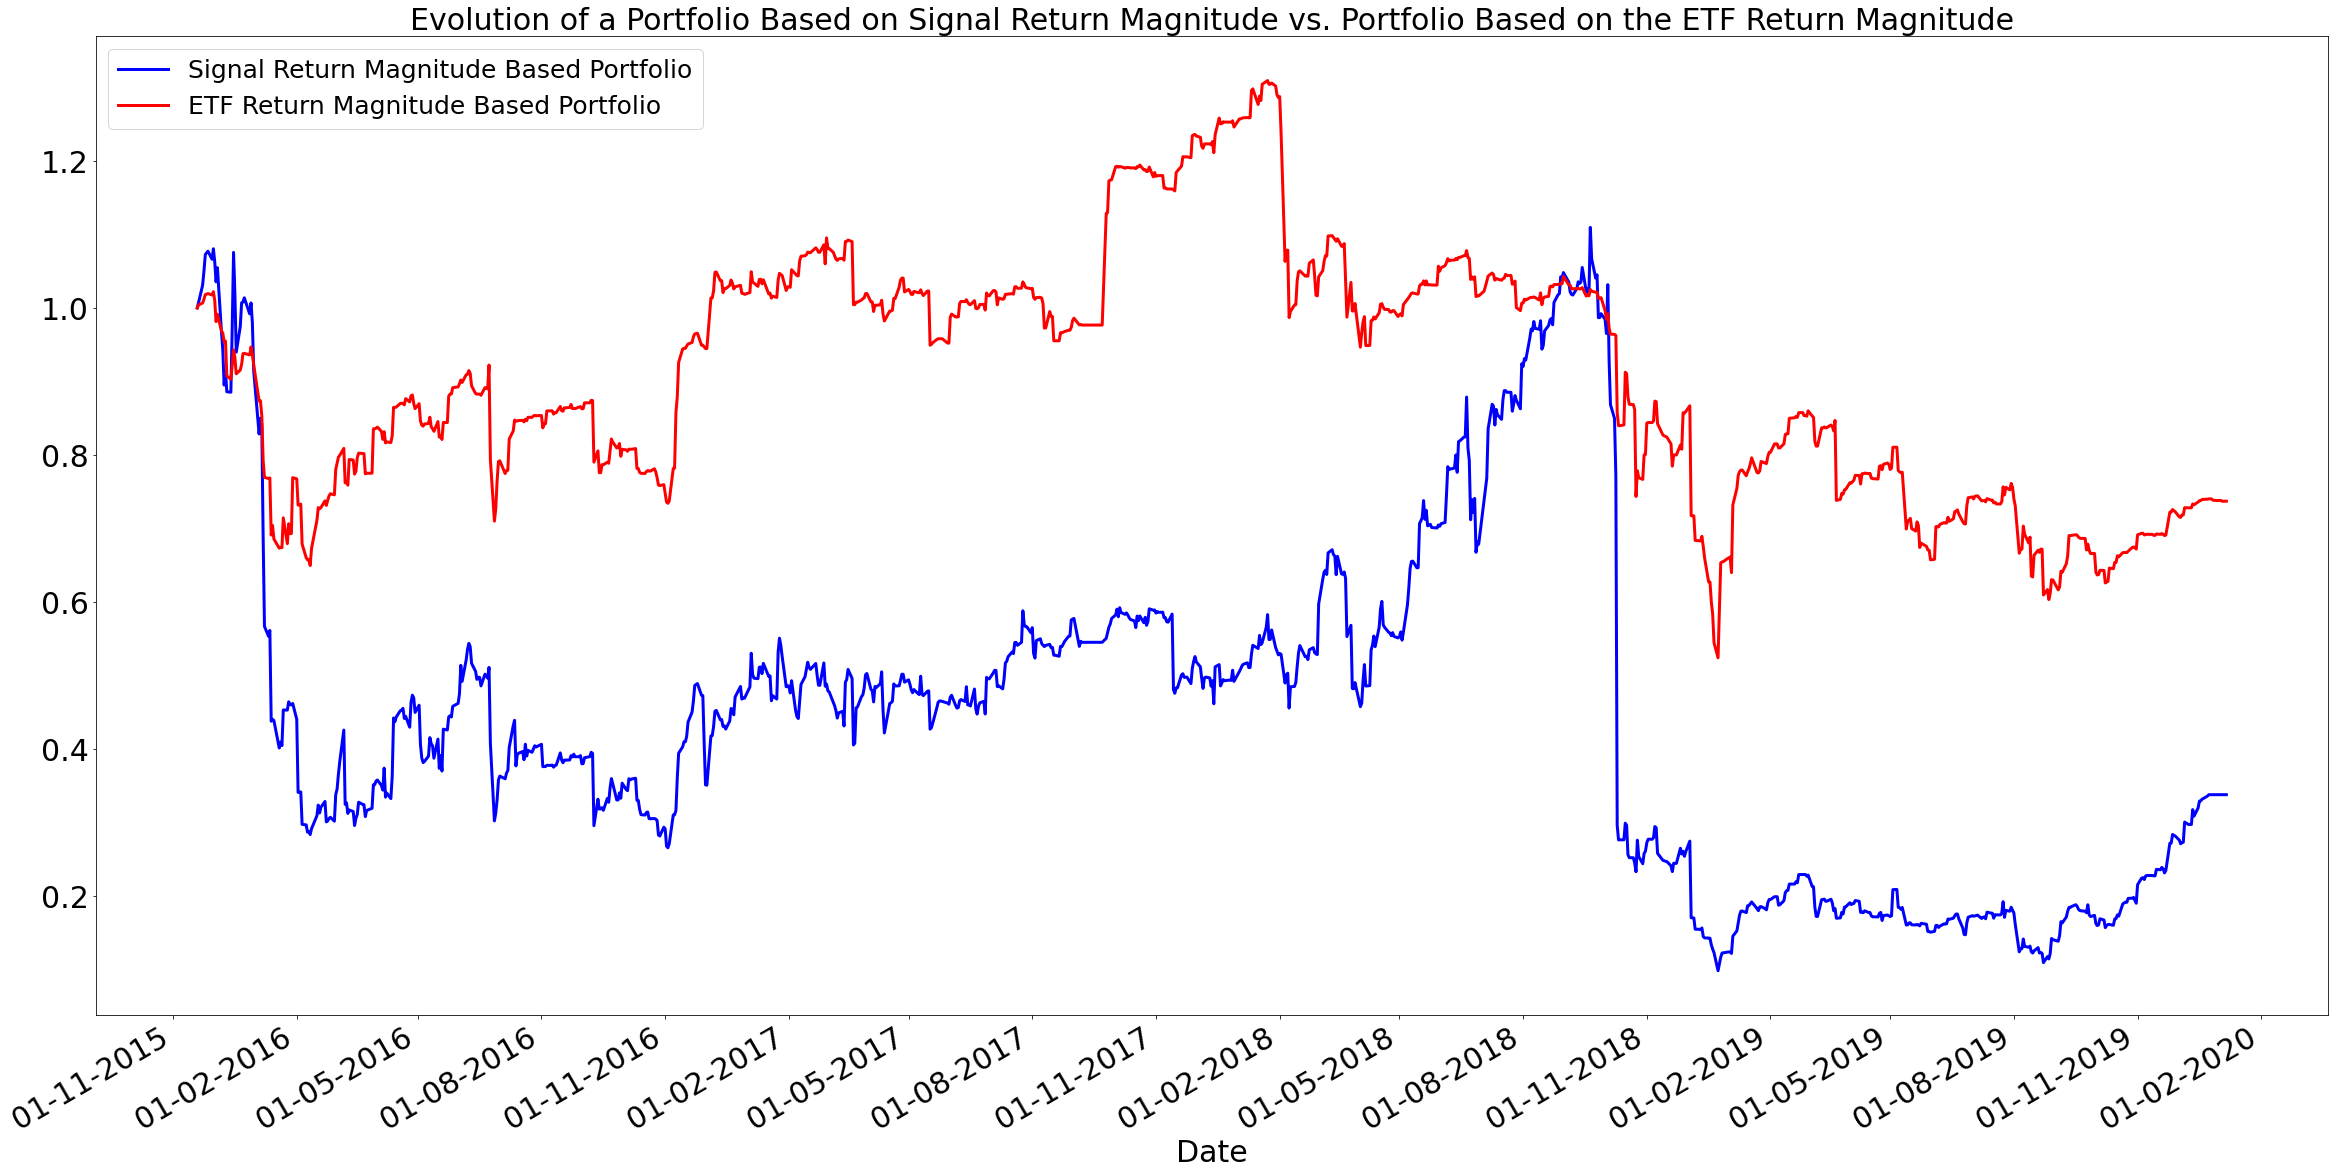

In [37]:
#Timeplot of Evolution of a Portfolio Based on Signal's Return Magnitude vs. Portfolio Based on the ETF's Return Magnitude
plt.subplots(figsize = (40,20))

plt.title('Evolution of a Portfolio Based on Signal Return Magnitude vs. Portfolio Based on the ETF Return Magnitude', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax12 = df_signal2['SRet_Mag Portfolio'].plot(color = 'blue',label = 'Signal Return Magnitude Based Portfolio',  linewidth = 3)
ax13 = df_signal2['ETFRet_Mag Portfolio'].plot(color = 'red', label = 'ETF Return Magnitude Based Portfolio', linewidth = 3)

h12, l12 = ax12.get_legend_handles_labels()
h13, l13 = ax13.get_legend_handles_labels()

plt.legend(h12, l12, loc=2, prop={'size': 25})

**Conclusion**: The above timeplot shows that the signal-based portfolio underperforms the comparable portfolio independent of it, particularly because of the extremely large size of the signal's bets around 1 February 2016 and 1 November 2018 combined with the negative returns over those periods.

___

## 2.3. Comparing Portfolio Returns Based on Signal's Return Magnitude and Direction with those Based on the ETF's Return Magnitude and Direction

Finally, we now combine the information provided in the signal returns' direction and magnitude into one portfolio, and compare its performance with a portfolio which depends on the actual adj close returns' direction and magnitude (signal-independent).

Since the confusion matrix captures the accuracy of the signal's direction predictions, it would be exactly the same as the one produced in section 2.1. This is shown below.

In [38]:
#Evolution of a Portfolio Based on Signal's Return Magnitude & Direction vs. Portfolio Based on the ETF's Return Magnitude & Direction

df_signal3 = pd.DataFrame()

df_signal3['Signal'] = df_corrected['Signal']
df_signal3['SRet_Mag+Dir'] = 100 * np.log(df_signal3['Signal']/df_signal3['Signal'].shift(1))

df_signal3['Adj Close'] = df_corrected['Adj Close']
df_signal3['Adj Close Log Return'] = np.log(df_signal3['Adj Close']/df_signal3['Adj Close'].shift(1))
df_signal3['ETFRet_Mag'] = 100 * abs(df_signal3['Adj Close Log Return'])

df_signal3['ETFRet_Mag+Dir Portfolio'] = np.exp((df_signal3['Adj Close Log Return'] * df_signal3['ETFRet_Mag']).cumsum())
df_signal3['SRet_Mag+Dir Portfolio'] = np.exp((df_signal3['Adj Close Log Return'] * df_signal3['SRet_Mag+Dir']).cumsum())


df_signal3.loc['2015-11-19', 'ETFRet_Mag+Dir Portfolio'] = 1
df_signal3.loc['2015-11-19', 'SRet_Mag+Dir Portfolio'] = 1

df_signal3

Signal  SRet_Mag+Dir   Adj Close  Adj Close Log Return  \
Date                                                                    
2015-11-19  13.768540           NaN  108.281601                   NaN   
2015-11-20  13.608819     -1.166824  108.981323              0.006441   
2015-11-23  12.990589     -4.649285  109.522453              0.004953   
2015-11-24  12.667435     -2.519063  110.324837              0.007299   
2015-11-25  13.019910      2.744520  111.183159              0.007750   
2015-11-27  12.879819     -1.081805  111.602997              0.003769   
2015-11-30  13.184791      2.340233  111.117851             -0.004357   
2015-12-01  12.922631     -2.008385  111.854897              0.006611   
2015-12-02  13.118076      1.501094  110.651367             -0.010818   
2015-12-03  12.916540     -1.548244  108.785408             -0.017007   
2015-12-04  13.155278      1.831439  109.886322              0.010069   
2015-12-07  12.430221     -5.669235  108.234947             -0.015142   
2015-12-08  13.030335      4.714942  107.637833             -0.005532   
2015-12-09  12.439604     -4.639485  106.434288             -0.011244   
2015-12-10  13.249671      6.308746  106.788841              0.003326   
2015-12-11  13.067526     -1.384250  104.409737             -0.022530   
2015-12-14  13.054955     -0.096248  103.663368             -0.007174   
2015-12-15  12.231405     -6.516093  105.156120              0.014297   
2015-12-16  13.078074      6.693027  106.760834              0.015145   
2015-12-17  12.436579     -5.029499  105.622612             -0.010719   
2015-12-18  13.107495      5.254213  104.008545             -0.015399   
2015-12-21  12.488531     -4.837350  104.792259              0.007507   
2015-12-22  12.943330      3.576988  105.753227              0.009128   
2015-12-23  12.953485      0.078427  107.087379              0.012537   
2015-12-24  12.566589     -3.032325  107.289787              0.001888   
2015-12-28  13.169915      4.689347  106.793152             -0.004640   
2015-12-29  12.988398     -1.387856  107.945709              0.010735   
2015-12-30  12.644827     -2.680832  106.858749             -0.010121   
2015-12-31  11.963824     -5.536075  105.528168             -0.012530   
2016-01-04  12.475992      4.191869  103.082527             -0.023448   
2016-01-05  11.093390    -11.745669  103.307411              0.002179   
2016-01-06  11.161586      0.612865  101.733200             -0.015355   
2016-01-07  12.011354      7.337424   99.015808             -0.027074   
2016-01-08  10.722719    -11.348760   97.310440             -0.017373   
2016-01-11  11.328934      5.499524   96.888771             -0.004343   
2016-01-12  10.807525     -4.711731   97.179237              0.002993   
2016-01-13  11.661341      7.603649   94.058937             -0.032636   
2016-01-14  11.709747      0.414244   95.361397              0.013752   
2016-01-15  11.682590     -0.232186   93.815323             -0.016346   
2016-01-19  10.942456     -6.544948   92.550323             -0.013576   
2016-01-20  11.479756      4.793485   92.934502              0.004142   
2016-01-21  10.913312     -5.060176   92.718971             -0.002322   
2016-01-22  11.435968      4.678017   94.986595              0.024163   
2016-01-25  11.433675     -0.020057   92.878281             -0.022446   
2016-01-26  11.577177      1.247269   94.733612              0.019779   
2016-01-27  11.639571      0.537496   93.431114             -0.013844   
2016-01-28  10.712037     -8.304249   93.412376             -0.000201   
2016-01-29  10.725925      0.129559   96.476471              0.032275   
2016-02-01  11.901013     10.395984   96.036064             -0.004575   
2016-02-02  10.582996    -11.737493   93.965240             -0.021799   
2016-02-03  10.626061      0.406094   94.087059              0.001296   
2016-02-04  10.662134      0.338907   94.452484              0.003876   
2016-02-05  11.206475      4.979312   91.866287             -0.027763   


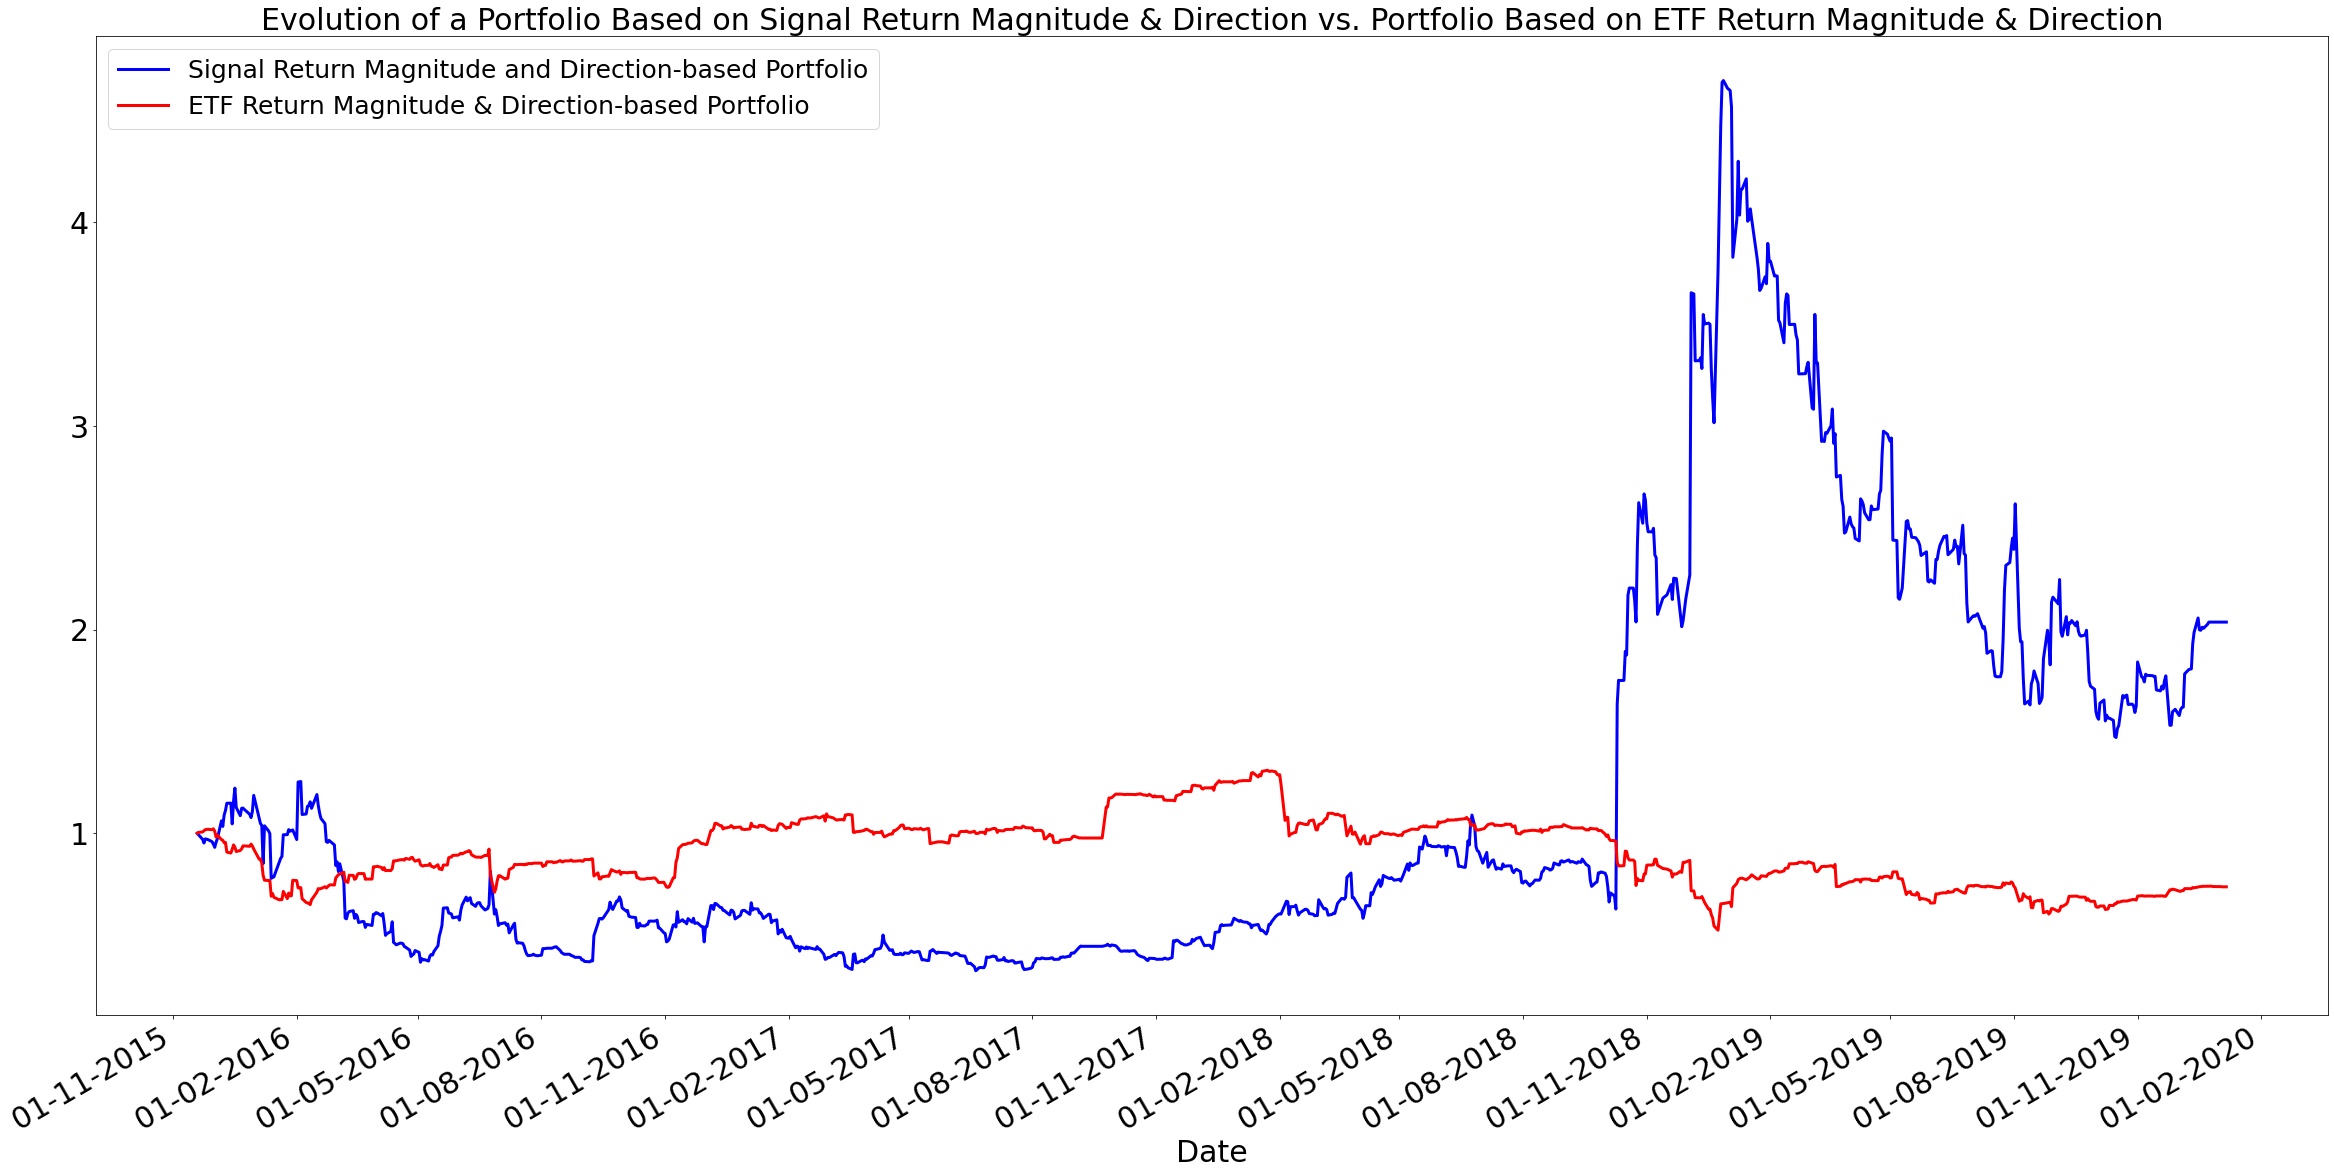

In [39]:
#Timeplot of Evolution of a Portfolio Based on Signal's Return Magnitude & Direction vs. Portfolio Based on the ETF's Return Magnitude & Direction
plt.subplots(figsize = (40,20))

plt.title('Evolution of a Portfolio Based on Signal Return Magnitude & Direction vs. Portfolio Based on ETF Return Magnitude & Direction', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax14 = df_signal3['SRet_Mag+Dir Portfolio'].plot(color = 'blue', label = 'Signal Return Magnitude and Direction-based Portfolio' , linewidth = 3)
ax15 = df_signal3['ETFRet_Mag+Dir Portfolio'].plot(color = 'red', label = 'ETF Return Magnitude & Direction-based Portfolio' , linewidth = 3)

h14, l14 = ax14.get_legend_handles_labels()
h15, l15 = ax15.get_legend_handles_labels()

plt.legend(h14, l14, loc=2, prop={'size': 25})

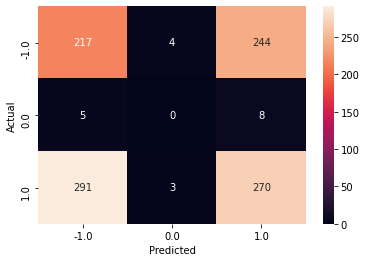

In [40]:
#Confusion Matrix

confusion_matrix3 = pd.crosstab(np.sign(df_signal3['Adj Close Log Return'][1 : ]), np.sign(df_signal3['SRet_Mag+Dir'][1 : ]), rownames = ['Actual'], colnames = ['Predicted'])

sns.heatmap(confusion_matrix3, annot=True, fmt='g')


**Conclusion**: Surprisingly, the signal-based portfolio under this scenario outperforms a comparable portfolio which is independent of it. This is primarily because of the huge jump in the former between November 2018 and February 2019. Before this, the signal-based portfolio was underperforming its peer, and it declined sharply in value following this period.

___

## 2.4. Comparing Evolution of the 3 Signal-based Portfolios

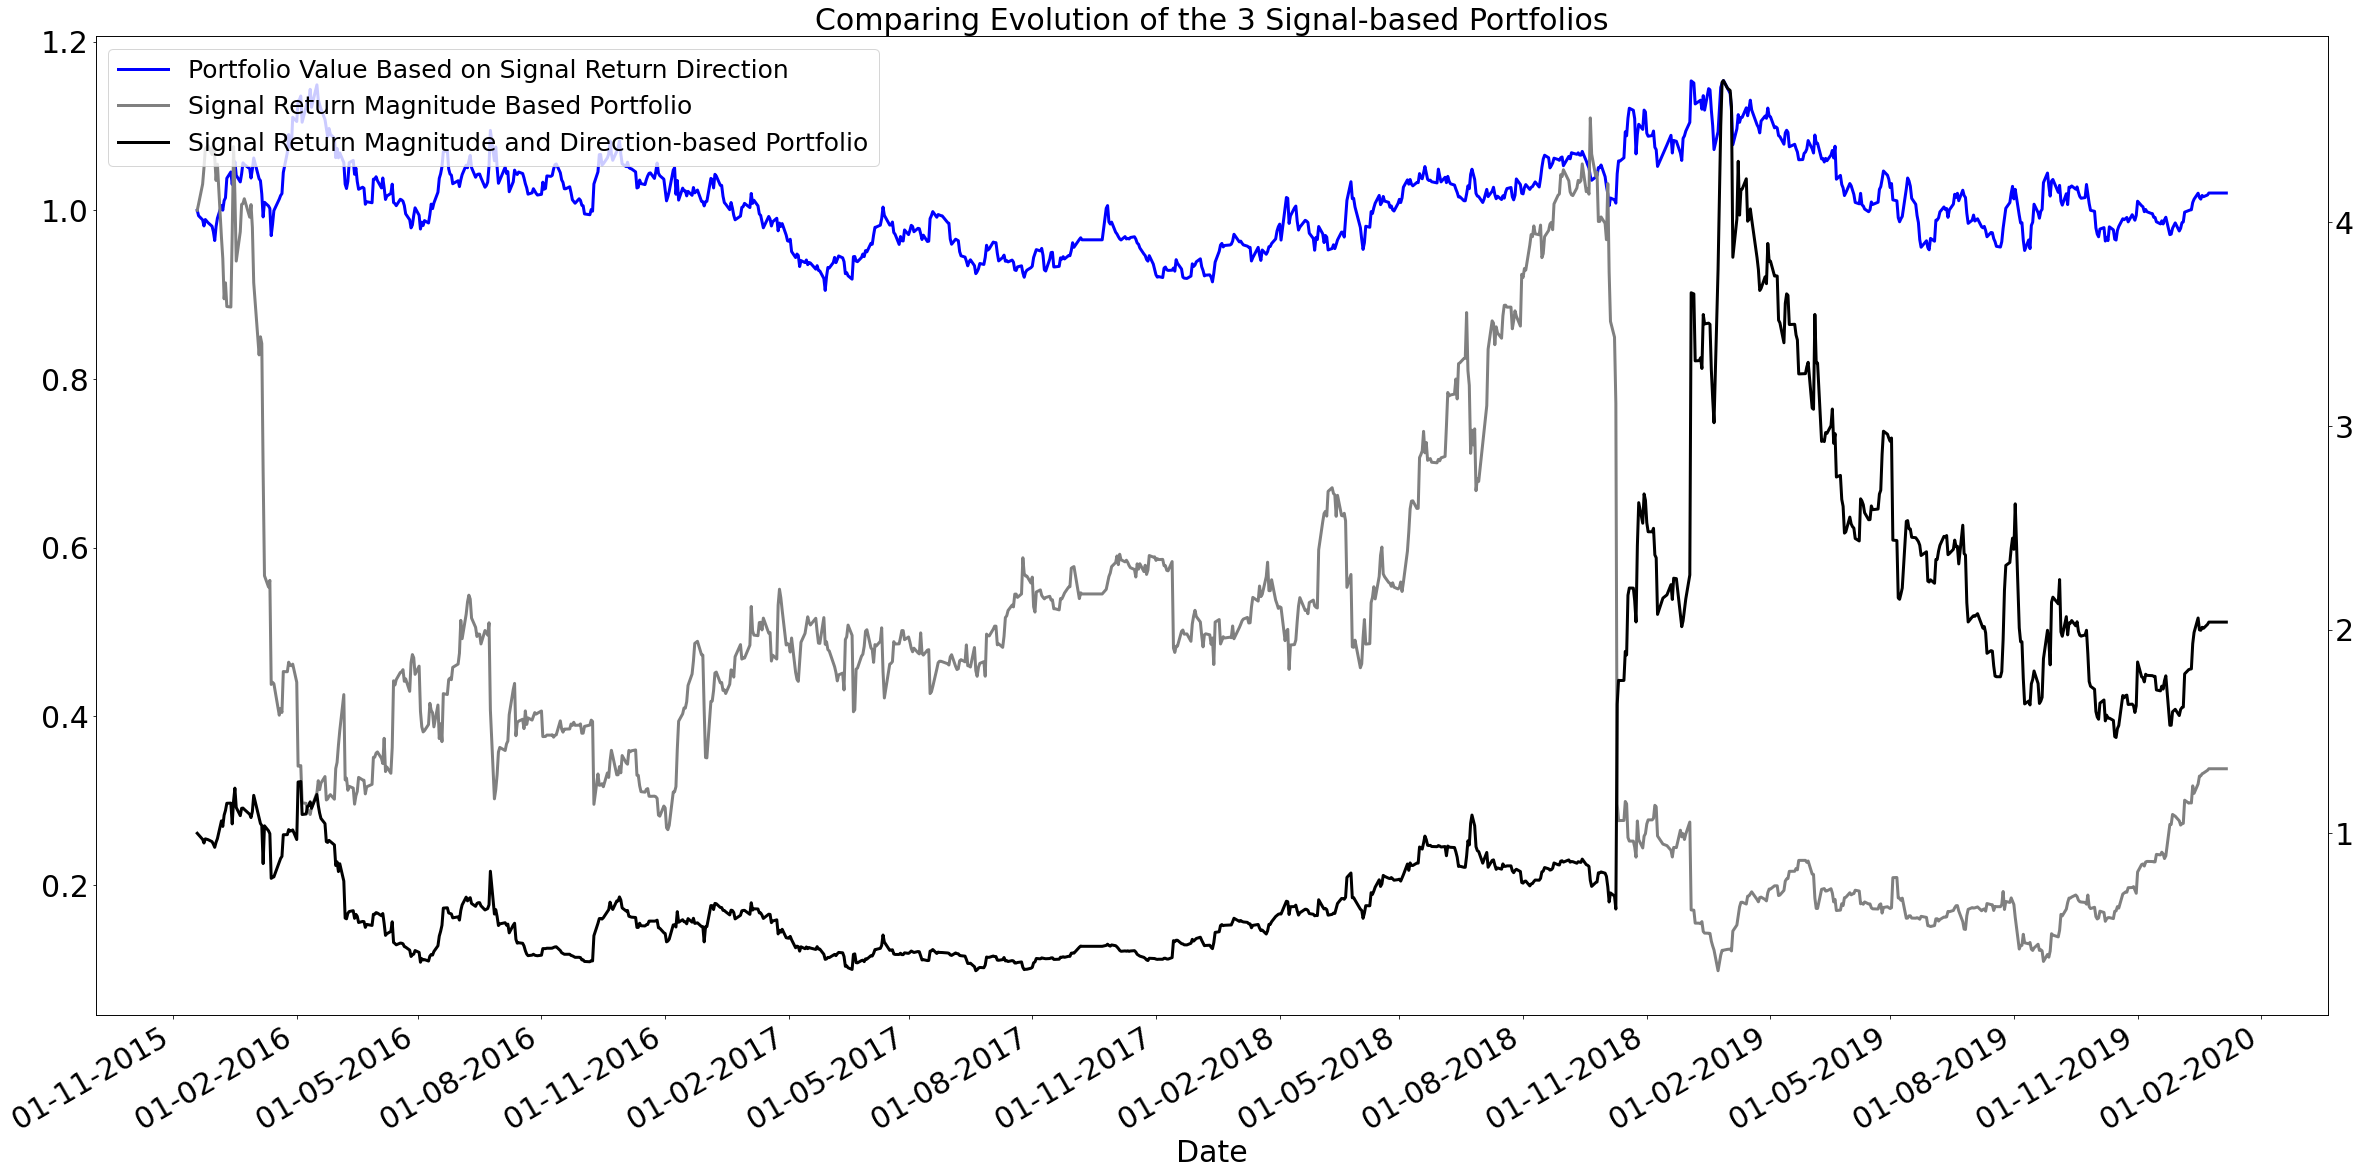

In [41]:
#Comparing Evolution of the 3 Signal-based Portfolios
plt.subplots(figsize = (40,20))

plt.title('Comparing Evolution of the 3 Signal-based Portfolios', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(fontsize = 30), plt.yticks(fontsize = 30)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))


ax16 = df_signal1['SRet_Dir Portfolio'].plot(color = 'blue', label = 'Portfolio Value Based on Signal Return Direction', linewidth = 3)
ax17 = df_signal2['SRet_Mag Portfolio'].plot(color = 'grey', label = 'Signal Return Magnitude Based Portfolio' , linewidth = 3)
ax18 = df_signal3['SRet_Mag+Dir Portfolio'].plot(color = 'black', secondary_y = True , label = 'Signal Return Magnitude and Direction-based Portfolio', linewidth = 3)
plt.yticks(fontsize = 30)

h16, l16 = ax16.get_legend_handles_labels()
h17, l17 = ax17.get_legend_handles_labels()
h18, l18 = ax18.get_legend_handles_labels()

plt.legend(h16+h18, l16+l18, loc=2, prop={'size': 25})

The above chart explains why the final signal-based portfolio outperformed its peer whereas the first two didn't. Between November 2018 and February 2019, the portfolio given by the grey line declined massively. Its large position bets combined with negative returns on the ETF translated into those huge losses. When the direction of the portfolio was determined by the signal instead (black line), the correct prediction of negative returns resulted in short positions with large sizes during that period, which led to the massive gain in the final portfolio's value.

# 3. Final Conclusion and Next Steps

## 3.1. Data Quality
The above data quality checks bring to light several errors in the provided dataset. 

Not only is ETF price data missing for 6 trading days but the vendor fails to provide signal data for several days, especially towards the end of the dataset's horizon. These missing values have been estimated using time-based interpolation. 

Additionally, the dataset reports erroneous high and low prices for several dates. These have been fixed by replacing the erroneous values with the calculated high/ low price among the reported data for each trading day.

Lastly, an inconsistent relationship between Close and Adj Close is observed on 3 trading days. Adj Close levels on these are considered to be outliers, and are replaced by values predicted by a simple linear regression model of Adj Close on Close.

We do not analyse signal data for accuracy, except from estimating Zero values using time-based interpolation, since these have been estimated based on 4sight's proprietary system and we cannot comment on their accuracy without knowledge of how the system works.

## 3.2. Signal Effectiveness
To assess the signal's effectiveness in trading the ETF, we first evaluate how good it is in predicting the direction of the ETF on each trading day. To do so, we compare a long/short portfolio based on signal returns' direction with a simple buy and hold portfolio. The signal-based portfolio underperforms the buy-and-hold portfolio, which is also confirmed by a confusion matrix.

We then see if the signal returns' magnitude can provide useful information to outperform the ETF. This is done by comparing two portfolios whose position direction on each day (long or short) is determined by the direction of the ETF's Adj Close return. The difference between these portfolios is that the # units invested in the ETF each day is determined by the magnitude of signal returns for the signal-based portfolio and by the magnitude of ETF returns for the signal-independent comparable. In this case as well, the signal underperforms its peer.

Finally, we combine information contained in the signal returns' direction and magnitude by constructing a portfolio based on these, and comparing it with a portfolio constructed based on the ETF returns' direction and magnitude. Surprisingly, the signal-based portfolio outperforms its peer in this case. This is primarily because of the huge jump in the portfolio's value over a short period between November 2018 and February 2019. Before this, the signal-based portfolio underperforms its peer, and declines sharply in value following this period.

Based on the above analyses, I believe the signal has little effectiveness. Although a portfolio which takes into account the full information provided by the signal returns' direction and magnitude outperforms its signal-independent comparable, this only happens due to a sharp increase in its value over a very short time period relative to the analysis horizon. This might as well have been the result of a mere fluke.

In conclusion, the signal is ineffective since any portfolio based on the information contained in it fails to outperform its signal-independent peer on a consistent basis.

## 3.3. Next Steps
I would propose for a meeting to be arranged with the team behind 4sight to discuss the errors in the original dataset provided to us and the issues which may have caused them. More importantly, I would strongly recommend to request the 4sight team to provide a detailed understanding of the approach underlying this signal's construction, since the information provided in it has little effectiveness for our systematic investment engines to generate durable and consistent returns.